FLY114：強化版流程（log1p、SelectFromModel、XGB EarlyStopping、SMOTE vs class_weight 擇優）

[1] 載入資料...
原始資料形狀: (502, 17)

[2] 資料清理...
  SDNN: 發現 24 個離群值，設為缺失值
  LF: 發現 53 個離群值，設為缺失值
  HF: 發現 51 個離群值，設為缺失值
  LFHF: 發現 28 個離群值，設為缺失值
  SC: 發現 19 個離群值，設為缺失值
  FT: 發現 1 個離群值，設為缺失值
  RSA: 發現 25 個離群值，設為缺失值
  BMI: 發現 2 個離群值，設為缺失值
清理後資料形狀: (502, 17)

[3] 特徵工程...
  新增特徵: LF_HF_ratio, LF_plus_HF, LF_prop, HF_prop
  新增特徵: Age_BMI_interaction
  新增特徵: SDNN_SC_ratio

[4] 缺失值處理（概覽）...

缺失值報告:
                 column  missing_count  missing_ratio
16              HF_prop             63       0.125498
15              LF_prop             63       0.125498
14           LF_plus_HF             63       0.125498
13          LF_HF_ratio             63       0.125498
7                    LF             53       0.105578
8                    HF             51       0.101594
18        SDNN_SC_ratio             43       0.085657
9                  LFHF             28       0.055777
12                  RSA             25       

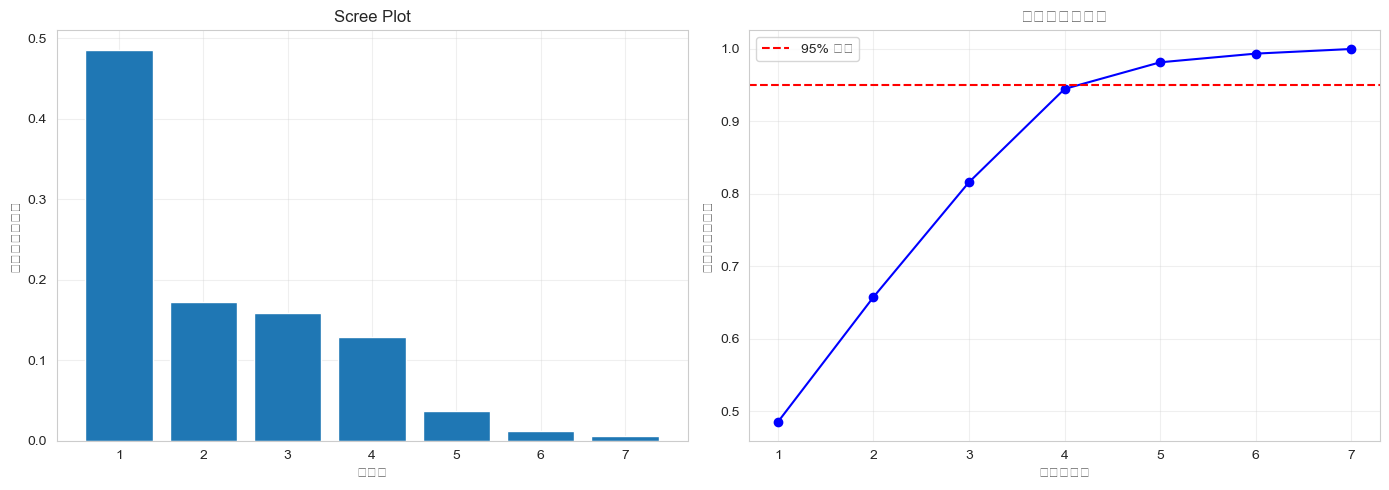

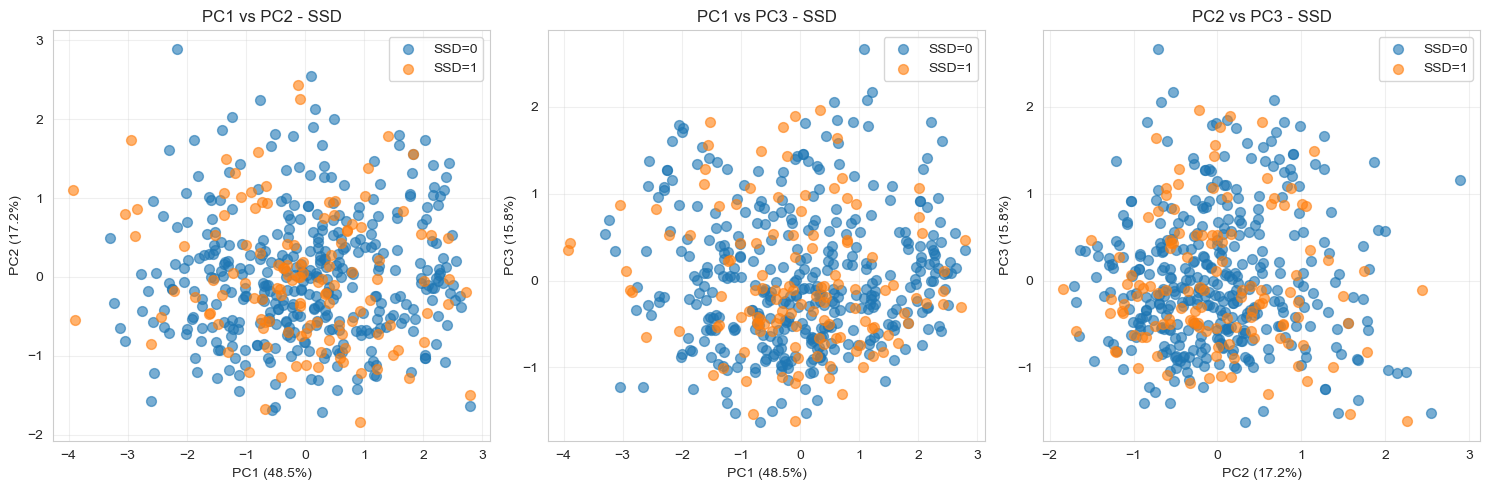

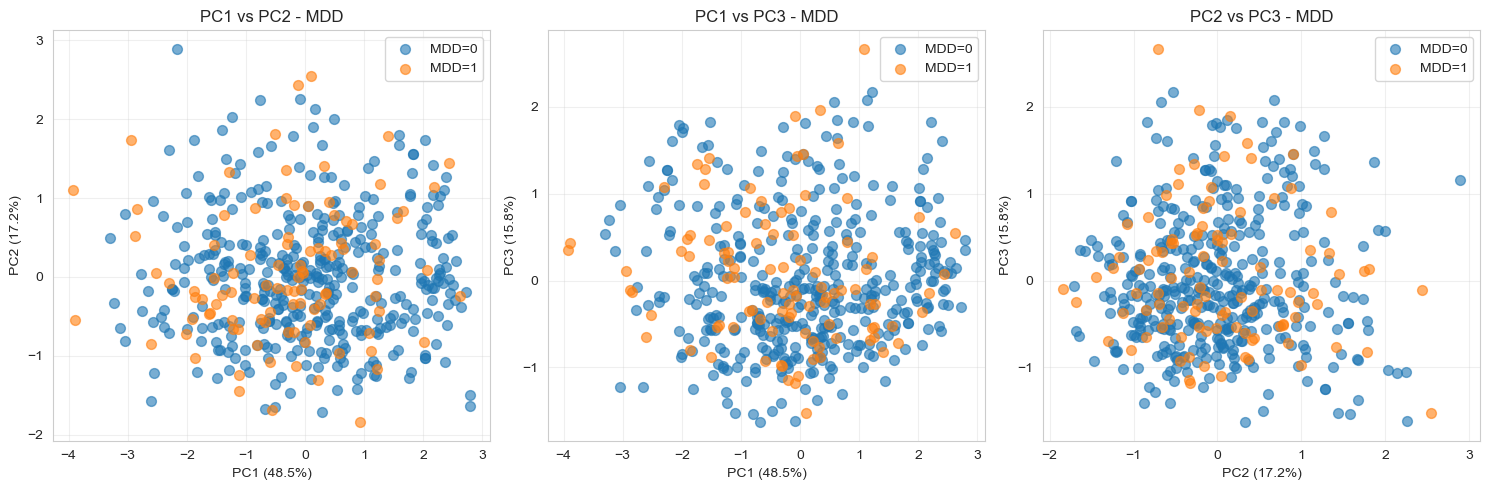

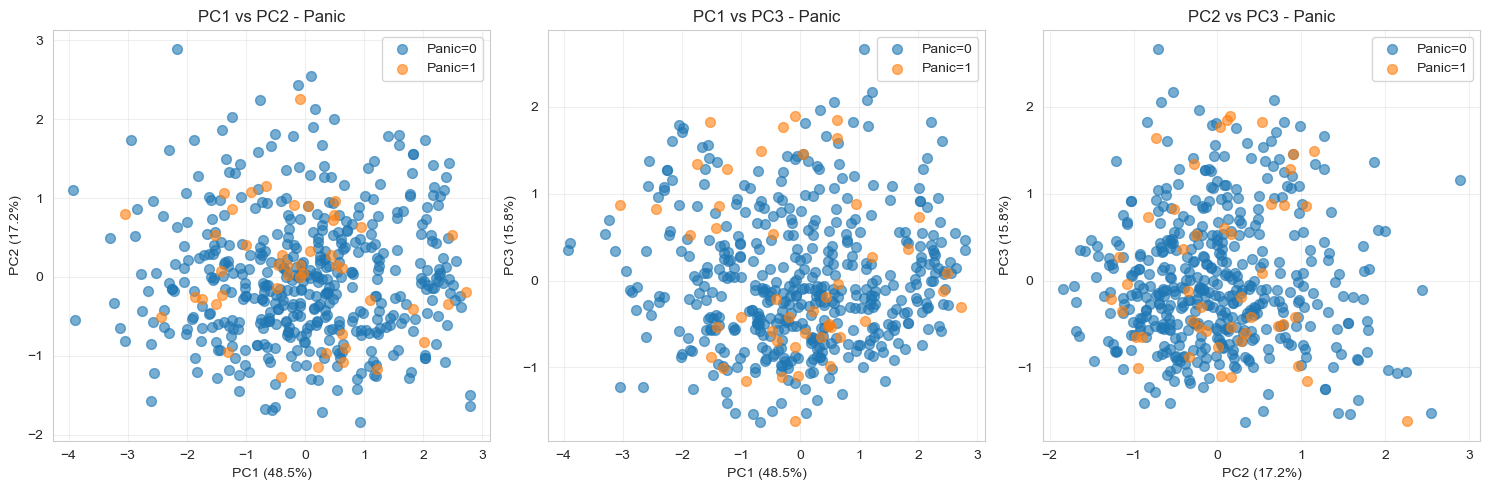

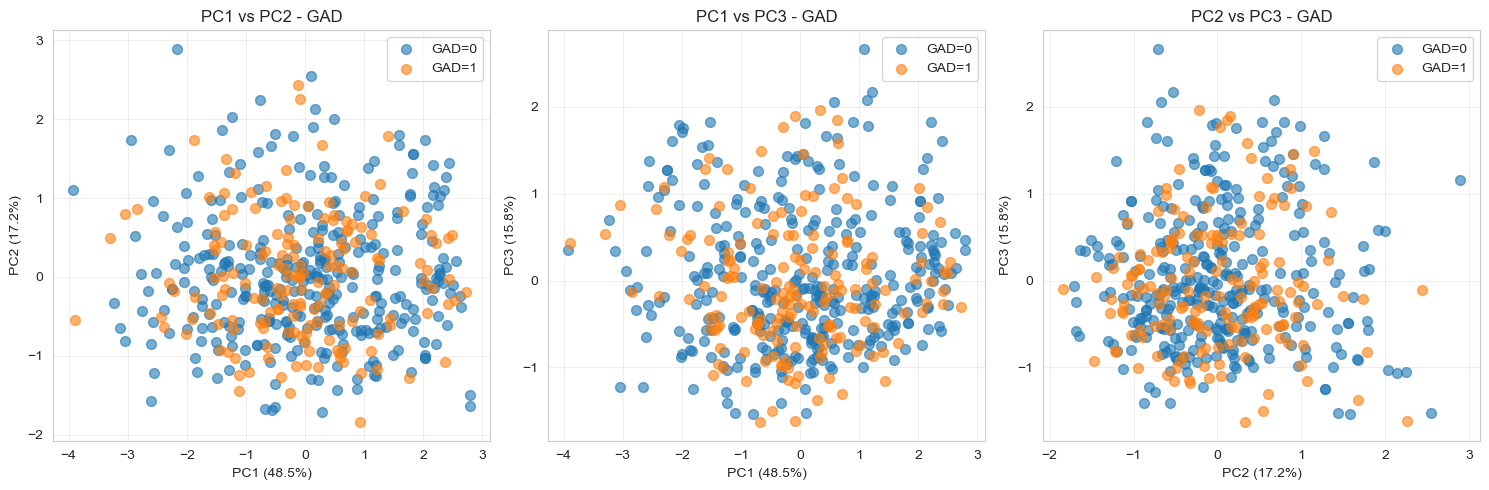


[5b] UMAP 非線性降維...


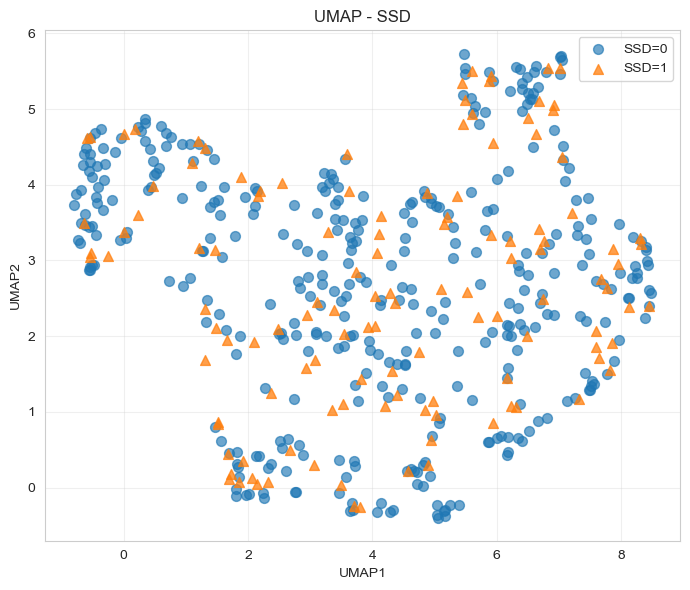

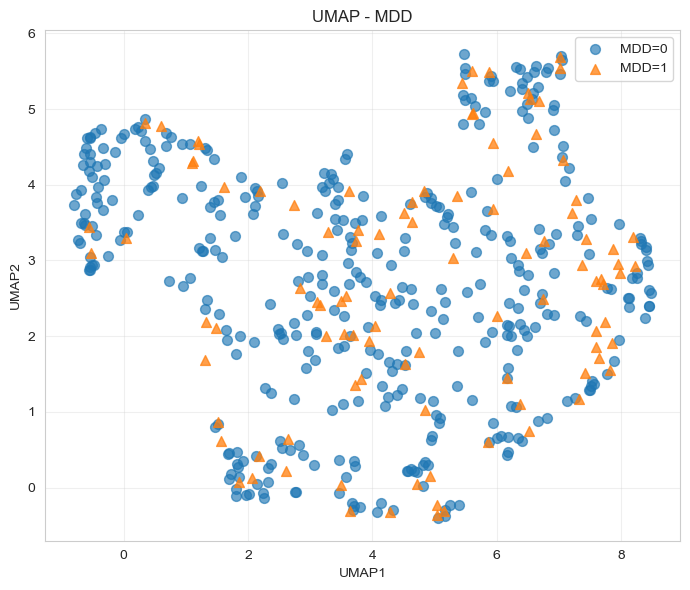

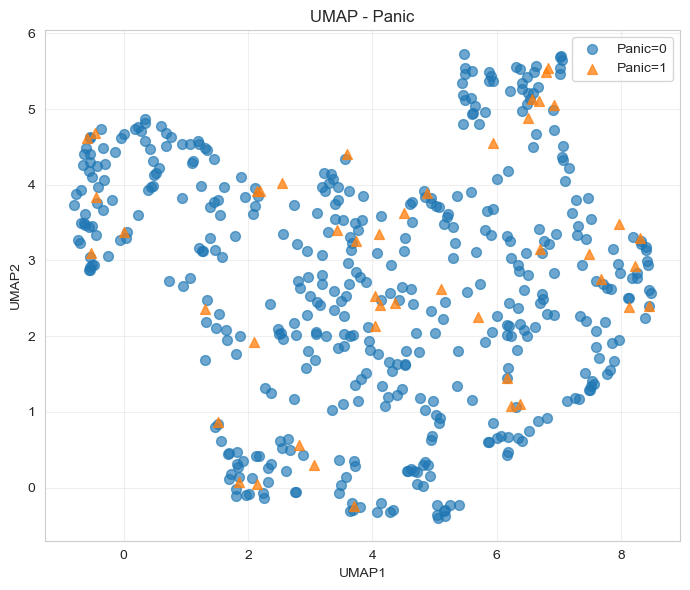

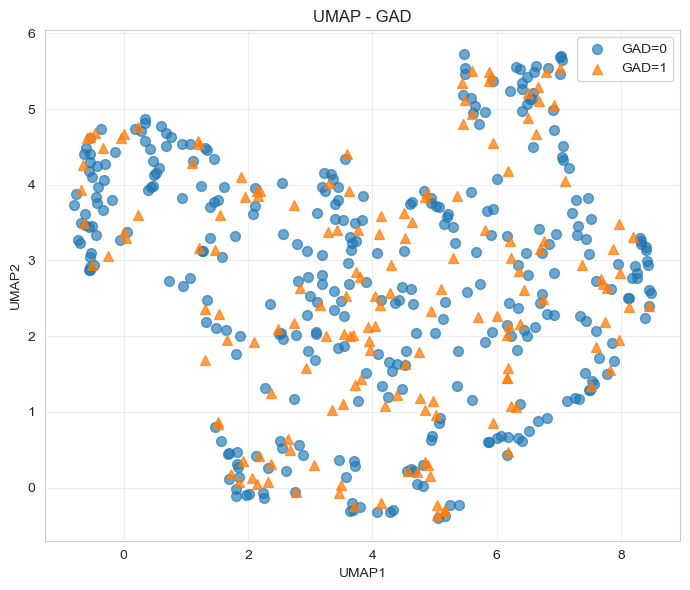


[6] 特徵重要性分析...

SSD 特徵重要性 (Top 10):
                feature  mutual_info  rf_importance  combined_score
2                   BMI     0.022813       0.114219        0.906465
17  Age_BMI_interaction     0.026669       0.073769        0.798094
15              LF_prop     0.028063       0.049706        0.717589
16              HF_prop     0.027233       0.053026        0.717335
12                  RSA     0.020769       0.070570        0.678965
0                   Age     0.021419       0.059320        0.641302
13          LF_HF_ratio     0.019556       0.047748        0.557450
10                   SC     0.008029       0.059887        0.405220
11                   FT     0.000000       0.089630        0.392359
18        SDNN_SC_ratio     0.000000       0.068949        0.301828


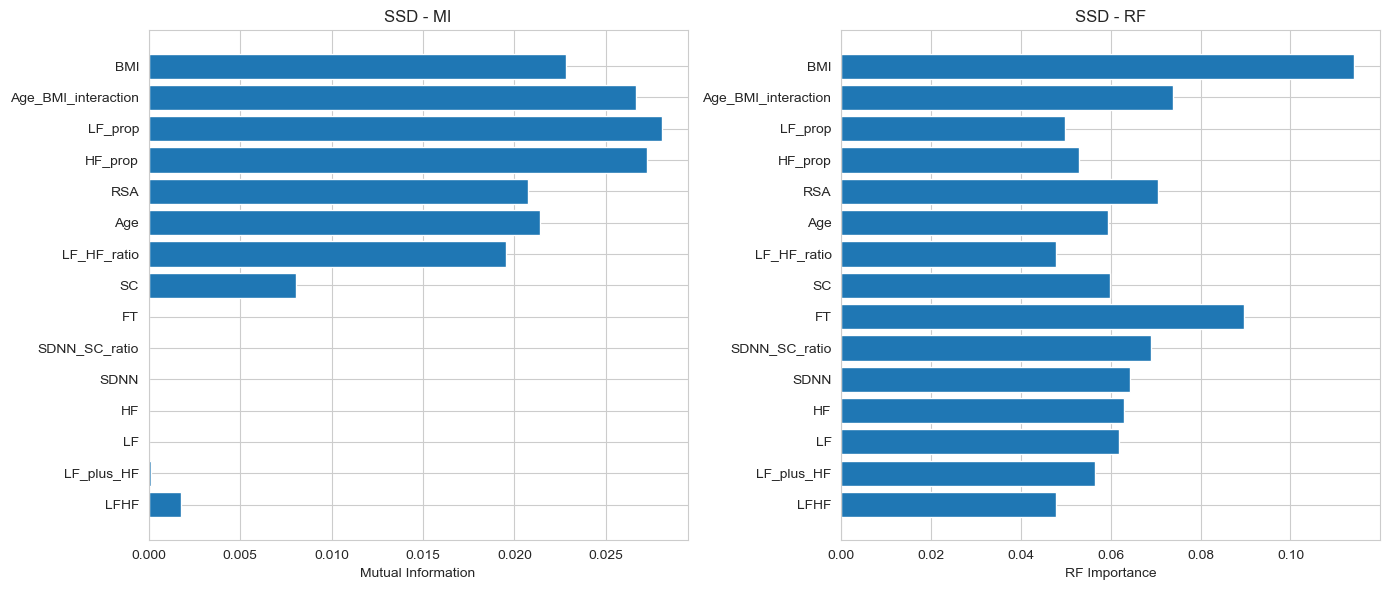


MDD 特徵重要性 (Top 10):
                feature  mutual_info  rf_importance  combined_score
0                   Age     0.020880       0.076542        0.891829
8                    HF     0.023042       0.065050        0.872878
5                 MARTA     0.021525       0.028016        0.627666
14           LF_plus_HF     0.009788       0.063772        0.577950
17  Age_BMI_interaction     0.003157       0.087227        0.568494
11                   FT     0.006102       0.075965        0.567852
2                   BMI     0.004157       0.077330        0.533465
18        SDNN_SC_ratio     0.001934       0.068577        0.435062
12                  RSA     0.000000       0.071235        0.408332
10                   SC     0.000000       0.069814        0.400182


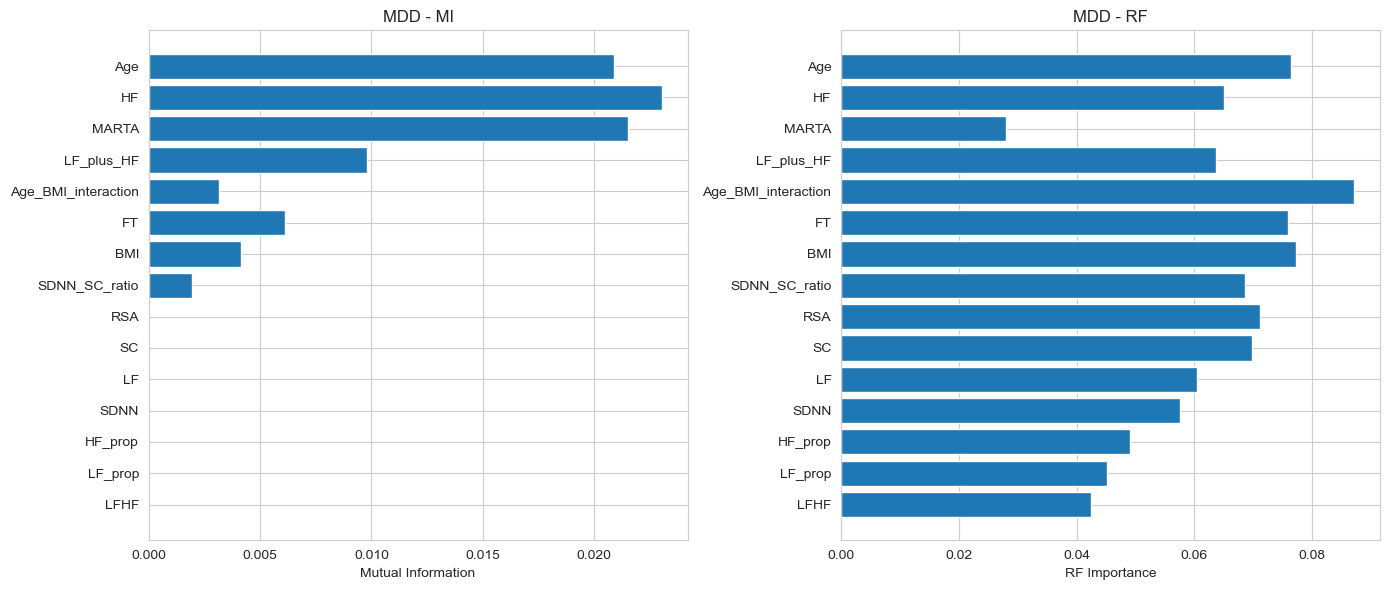


Panic 特徵重要性 (Top 10):
        feature  mutual_info  rf_importance  combined_score
0           Age     0.023560       0.063044        0.849572
16      HF_prop     0.020086       0.067032        0.797967
15      LF_prop     0.018647       0.064456        0.753152
14   LF_plus_HF     0.016637       0.051210        0.637032
9          LFHF     0.010051       0.066080        0.579720
11           FT     0.001474       0.090173        0.531291
2           BMI     0.000000       0.085784        0.475663
12          RSA     0.004043       0.058494        0.410150
13  LF_HF_ratio     0.002300       0.064502        0.406468
6          SDNN     0.000000       0.068120        0.377716


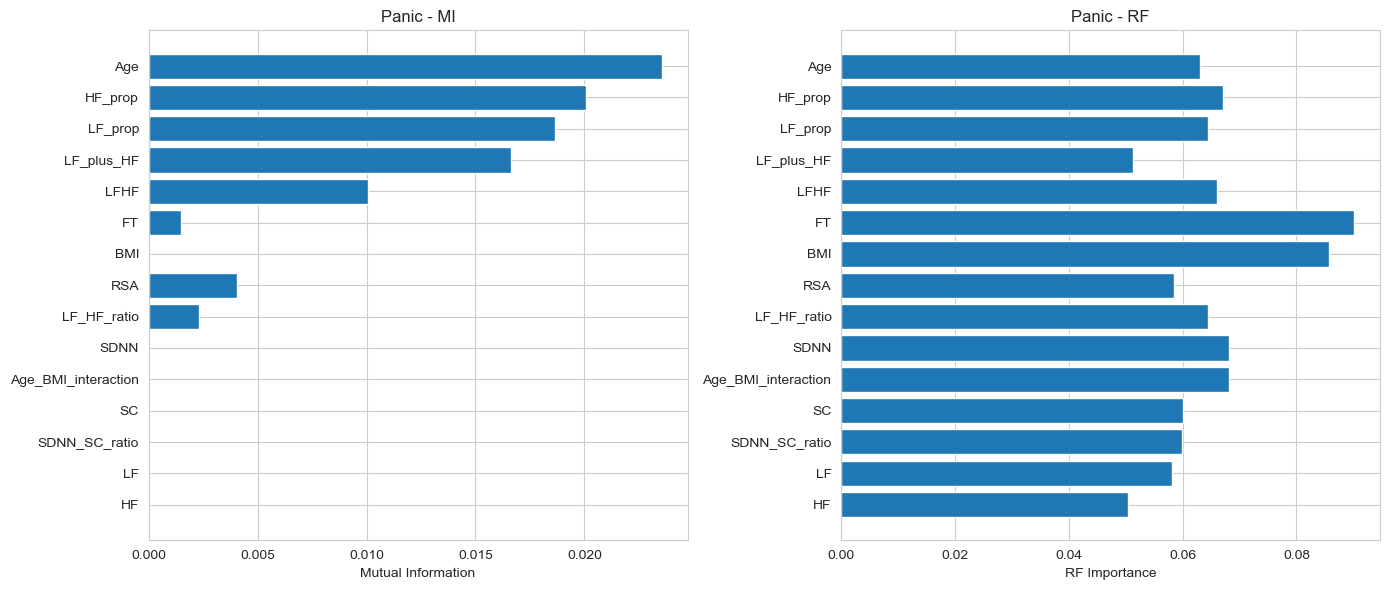


GAD 特徵重要性 (Top 10):
          feature  mutual_info  rf_importance  combined_score
11             FT     0.023374       0.101198        0.864054
15        LF_prop     0.032102       0.052053        0.757183
12            RSA     0.023815       0.077773        0.755181
6            SDNN     0.028042       0.063441        0.750201
16        HF_prop     0.031889       0.050957        0.748446
14     LF_plus_HF     0.023884       0.062159        0.679122
9            LFHF     0.021189       0.050304        0.578561
13    LF_HF_ratio     0.017866       0.051464        0.532538
0             Age     0.013305       0.065103        0.528896
18  SDNN_SC_ratio     0.012607       0.065308        0.519037


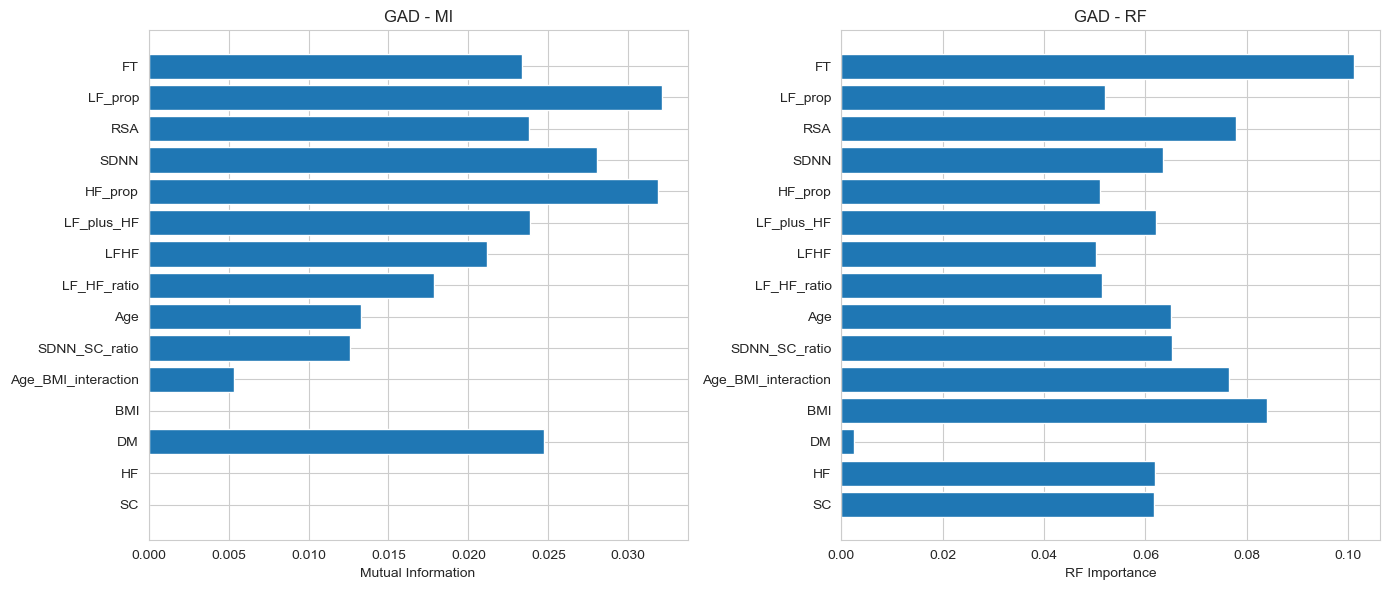


[7] 改進的二元分類模型...

處理 SSD...
  → 保存最佳（依 Test AP）：Random Forest (CW)

處理 MDD...
  → 保存最佳（依 Test AP）：XGBoost (ES)

處理 Panic...
  → 保存最佳（依 Test AP）：XGBoost (ES)

處理 GAD...
  → 保存最佳（依 Test AP）：Random Forest (CW)

[8] 結果彙整...

完整模型比較:
Label                       Model CV_AP Test_AUC Test_AP Best_F1 Best_Threshold  N_Train  N_Test
  SSD Logistic Regression (SMOTE) 0.399    0.613   0.356   0.480          0.487      401     101
  SSD       Random Forest (SMOTE) 0.415    0.634   0.359   0.436          0.579      401     101
  SSD   Gradient Boosting (SMOTE) 0.376    0.626   0.335   0.479          0.513      401     101
  SSD                 SVM (SMOTE) 0.403    0.602   0.316   0.447          0.488      401     101
  SSD    Logistic Regression (CW) 0.404    0.625   0.368   0.479          0.517      401     101
  SSD          Random Forest (CW) 0.407    0.628   0.404   0.500          0.497      401     101
  SSD      Gradient Boosting (CW) 0.411    0.596   0.288   0.451          0.119      401   

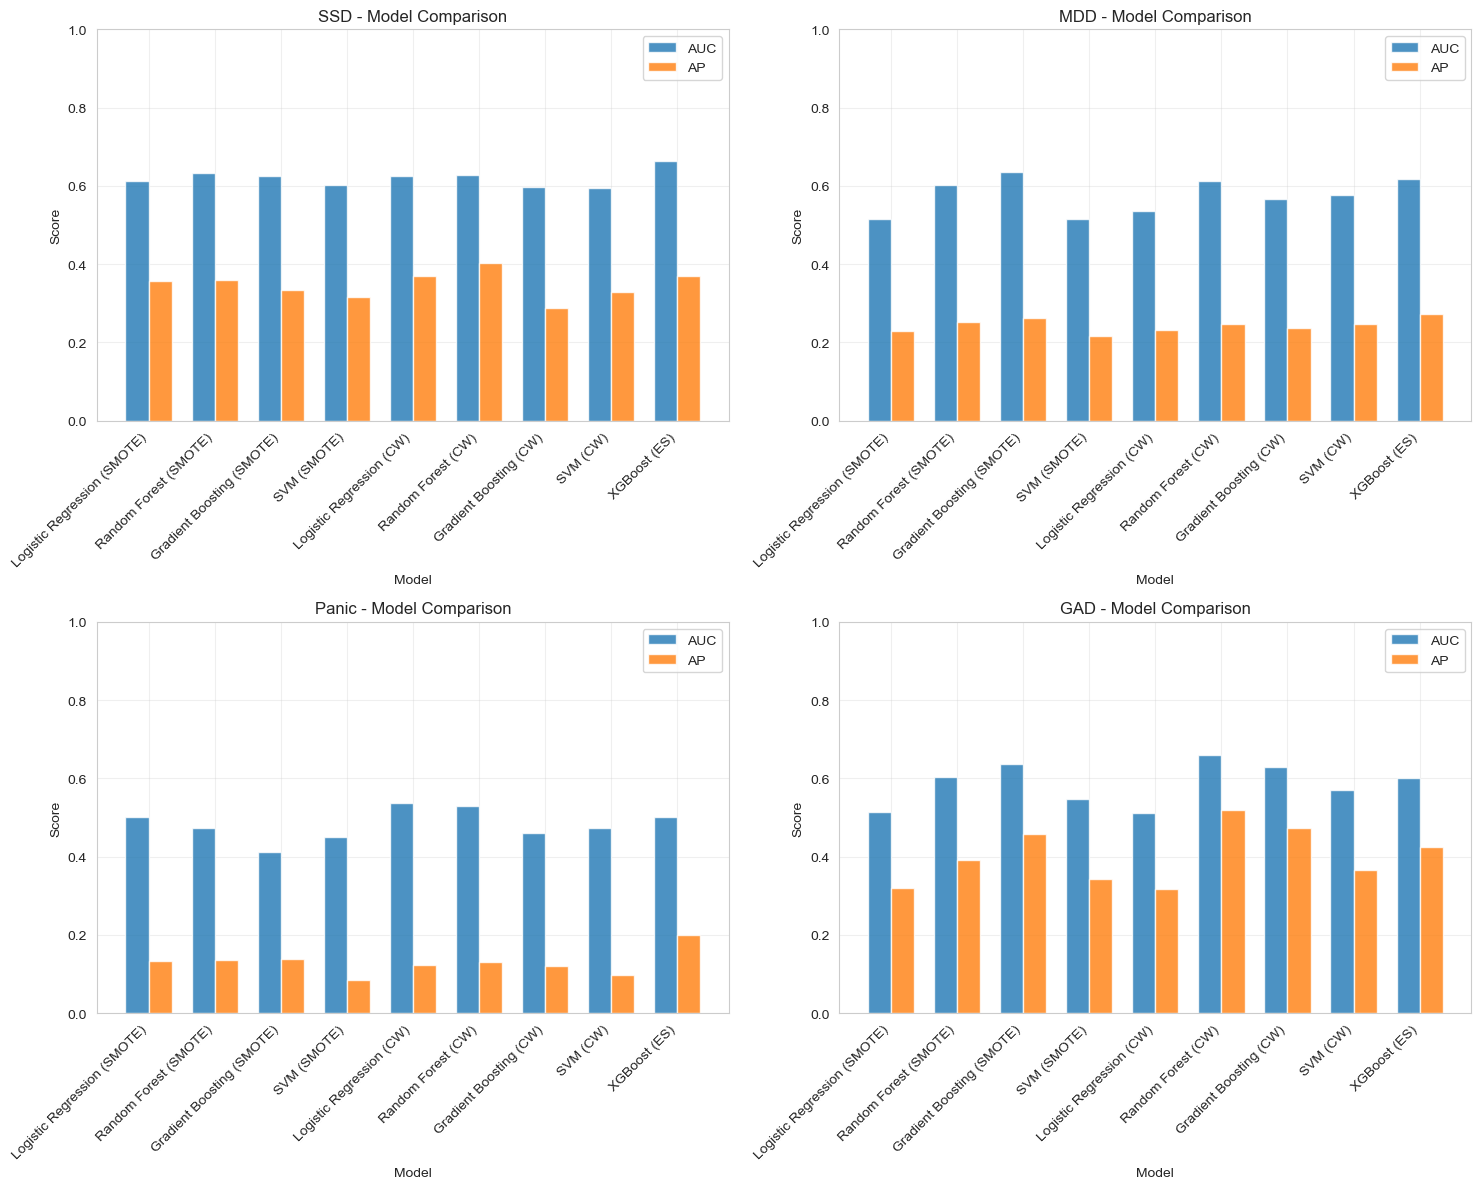


[9] 儲存結果...
✓ 結果已儲存至: D:\FLY114\Data_Improved\enhanced_analysis_summary.xlsx
✓ 圖表已儲存至: D:\FLY114\Data_Improved\enhanced_plots

分析完成!

最佳模型建議:
  SSD: XGBoost (ES) AUC=0.664, AP=0.369
  MDD: Gradient Boosting (SMOTE) AUC=0.635, AP=0.261
  Panic: Logistic Regression (CW) AUC=0.536, AP=0.123
  GAD: Random Forest (CW) AUC=0.660, AP=0.518


In [3]:
import sys
import os, warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# UMAP（非線性降維）
try:
    from umap import UMAP
    UMAP_OK = True
except Exception:
    try:
        from umap.umap_ import UMAP
        UMAP_OK = True
    except Exception:
        UMAP_OK = False
        print("⚠️ 未安裝 umap-learn，請先安裝：pip install umap-learn")

# 統計檢驗
try:
    from scipy.stats import mannwhitneyu, ks_2samp
    SCIPY_OK = True
except Exception:
    SCIPY_OK = False

# 機器學習相關
from sklearn.preprocessing import RobustScaler, FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import (
    StratifiedKFold, RandomizedSearchCV, 
    train_test_split
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    roc_auc_score, average_precision_score,
    precision_recall_curve, f1_score, confusion_matrix, roc_curve
)
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from scipy.stats import loguniform
import joblib

# XGBoost
from xgboost import XGBClassifier
import xgboost as xgb  # 用於舊版支援 early stopping 的 xgb.train

# 圖表風格
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# ==================== 路徑設定 ====================
BASE_DIR  = Path(r"D:\FLY114")
XLSX_PATH = BASE_DIR / "Diagnosis and autonomic marker data for VNS research_20250813.xlsx"
OUT_DIR   = BASE_DIR / "Data_Improved"
PLOTS_DIR = OUT_DIR / "enhanced_plots"
OUT_XLSX  = OUT_DIR / "enhanced_analysis_summary.xlsx"
MODELS_DIR = OUT_DIR / "models"

for d in [OUT_DIR, PLOTS_DIR, MODELS_DIR]:
    d.mkdir(parents=True, exist_ok=True)

SHEET_NAME = "Sheet1"

# ==================== 欄位定義 ====================
BASIC_COLS   = ["Age", "Sex", "BMI"]
LABEL_COLS   = ["SSD", "MDD", "Panic", "GAD"]
CONTROL_COLS = ["DM", "TCA", "MARTA"]
HRV_COLS     = ["SDNN", "LF", "HF", "LFHF", "SC", "FT", "RSA"]
ALL_FEATURES = BASIC_COLS + CONTROL_COLS + HRV_COLS

# 建議取 log 的欄位
LOG_SUGGESTED = ["BMI","SDNN","LF","HF","LFHF","SC","RSA"]

print("=" * 80)
print("FLY114：強化版流程（log1p、SelectFromModel、XGB EarlyStopping、SMOTE vs class_weight 擇優）")
print("=" * 80)

# ==================== 1. 載入資料 ====================
print("\n[1] 載入資料...")
df = pd.read_excel(XLSX_PATH, sheet_name=SHEET_NAME)
df.columns = [c.strip() for c in df.columns]
print(f"原始資料形狀: {df.shape}")

# ==================== 2. 資料清理 ====================
print("\n[2] 資料清理...")

for c in [*ALL_FEATURES, *LABEL_COLS]:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# Sex -> 0/1
if "Sex" in df.columns and (df["Sex"].dtype == object or df["Sex"].nunique(dropna=True) > 2):
    norm = df["Sex"].astype(str).str.lower().str[0].map({"m":1, "f":0})
    if norm.notna().mean() > 0.6:
        df["Sex"] = norm

# LFHF >= 0
if "LFHF" in df.columns:
    df.loc[df["LFHF"] < 0, "LFHF"] = np.nan

# IQR 去極端
def remove_outliers_iqr(df, cols, factor=3.0):
    df_clean = df.copy()
    for col in cols:
        if col in df_clean.columns:
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - factor * IQR
            upper = Q3 + factor * IQR
            outliers = ((df_clean[col] < lower) | (df_clean[col] > upper))
            n_outliers = outliers.sum()
            if n_outliers > 0:
                print(f"  {col}: 發現 {n_outliers} 個離群值，設為缺失值")
                df_clean.loc[outliers, col] = np.nan
    return df_clean

numerical_cols = [c for c in HRV_COLS + ["Age", "BMI"] if c in df.columns]
df = remove_outliers_iqr(df, numerical_cols, factor=3.0)
print(f"清理後資料形狀: {df.shape}")

# ==================== 3. 特徵工程 ====================
print("\n[3] 特徵工程...")

if all(c in df.columns for c in ["LF", "HF"]):
    df["LF_HF_ratio"] = df["LF"] / (df["HF"] + 1e-9)
    df["LF_plus_HF"] = df["LF"] + df["HF"]
    denom = (df["LF"] + df["HF"]).replace(0, np.nan)
    df["LF_prop"] = df["LF"] / denom
    df["HF_prop"] = df["HF"] / denom
    print("  新增特徵: LF_HF_ratio, LF_plus_HF, LF_prop, HF_prop")

if all(c in df.columns for c in ["Age", "BMI"]):
    df["Age_BMI_interaction"] = df["Age"] * df["BMI"]
    print("  新增特徵: Age_BMI_interaction")

if "SDNN" in df.columns and "SC" in df.columns:
    df["SDNN_SC_ratio"] = df["SDNN"] / (df["SC"] + 1e-9)
    print("  新增特徵: SDNN_SC_ratio")

ENGINEERED_FEATURES = ["LF_HF_ratio","LF_plus_HF","LF_prop","HF_prop","Age_BMI_interaction","SDNN_SC_ratio"]
ALL_FEATURES_EXT = ALL_FEATURES + [f for f in ENGINEERED_FEATURES if f in df.columns]

# ==================== 4. 缺失值概覽 ====================
print("\n[4] 缺失值處理（概覽）...")
missing_report = pd.DataFrame({
    'column': [c for c in ALL_FEATURES_EXT if c in df.columns],
    'missing_count': [df[c].isna().sum() for c in ALL_FEATURES_EXT if c in df.columns],
    'missing_ratio': [df[c].isna().sum()/len(df) for c in ALL_FEATURES_EXT if c in df.columns]
})
print("\n缺失值報告:")
print(missing_report.sort_values('missing_ratio', ascending=False))

for label in LABEL_COLS:
    if label in df.columns:
        mask = df[label].notna()
        print(f"  {label}: {mask.sum()} 個有效樣本")

# ==================== 5. PCA（含 log1p） ====================
print("\n[5] 改進的 PCA 分析...")

hrv_cols_available = [c for c in HRV_COLS if c in df.columns]
X_pca = df[hrv_cols_available].copy()

LOG_COLS_FOR_PCA = [c for c in LOG_SUGGESTED if c in X_pca.columns]
for c in LOG_COLS_FOR_PCA:
    X_pca[c] = np.log1p(X_pca[c].clip(lower=0))

imp = KNNImputer(n_neighbors=5)
X_pca_filled = pd.DataFrame(imp.fit_transform(X_pca), columns=X_pca.columns, index=X_pca.index)
scaler = RobustScaler()
X_pca_scaled = scaler.fit_transform(X_pca_filled)

pca = PCA(random_state=42)
X_pca_transformed = pca.fit_transform(X_pca_scaled)
explained_var = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    'Explained_Variance_Ratio': pca.explained_variance_ratio_,
    'Cumulative_Variance': np.cumsum(pca.explained_variance_ratio_)
})
print("\nPCA 解釋變異量:")
print(explained_var.head(10))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.bar(range(1, min(11, len(pca.explained_variance_ratio_)+1)), pca.explained_variance_ratio_[:10])
ax1.set_xlabel('主成分'); ax1.set_ylabel('解釋變異量比例'); ax1.set_title('Scree Plot'); ax1.grid(True, alpha=0.3)
ax2.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), 'bo-')
ax2.axhline(y=0.95, color='r', linestyle='--', label='95% 閾值')
ax2.set_xlabel('主成分數量'); ax2.set_ylabel('累積解釋變異量'); ax2.set_title('累積解釋變異量'); ax2.legend(); ax2.grid(True, alpha=0.3)
plt.tight_layout(); plt.savefig(PLOTS_DIR / "pca_variance_explained.png", dpi=300, bbox_inches='tight'); plt.show()

for label in LABEL_COLS:
    if label not in df.columns: 
        continue
    fig = plt.figure(figsize=(15, 5))
    ax1 = fig.add_subplot(131)
    mask0 = df[label] == 0; mask1 = df[label] == 1
    ax1.scatter(X_pca_transformed[mask0,0], X_pca_transformed[mask0,1], alpha=0.6, label=f'{label}=0', s=50)
    ax1.scatter(X_pca_transformed[mask1,0], X_pca_transformed[mask1,1], alpha=0.6, label=f'{label}=1', s=50)
    ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})'); ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})'); ax1.set_title(f'PC1 vs PC2 - {label}')
    ax1.legend(); ax1.grid(True, alpha=0.3)
    if len(pca.explained_variance_ratio_) >= 3:
        ax2 = fig.add_subplot(132)
        ax2.scatter(X_pca_transformed[mask0,0], X_pca_transformed[mask0,2], alpha=0.6, label=f'{label}=0', s=50)
        ax2.scatter(X_pca_transformed[mask1,0], X_pca_transformed[mask1,2], alpha=0.6, label=f'{label}=1', s=50)
        ax2.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})'); ax2.set_ylabel(f'PC3 ({pca.explained_variance_ratio_[2]:.1%})'); ax2.set_title(f'PC1 vs PC3 - {label}')
        ax2.legend(); ax2.grid(True, alpha=0.3)
        ax3 = fig.add_subplot(133)
        ax3.scatter(X_pca_transformed[mask0,1], X_pca_transformed[mask0,2], alpha=0.6, label=f'{label}=0', s=50)
        ax3.scatter(X_pca_transformed[mask1,1], X_pca_transformed[mask1,2], alpha=0.6, label=f'{label}=1', s=50)
        ax3.set_xlabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})'); ax3.set_ylabel(f'PC3 ({pca.explained_variance_ratio_[2]:.1%})'); ax3.set_title(f'PC2 vs PC3 - {label}')
        ax3.legend(); ax3.grid(True, alpha=0.3)
    plt.tight_layout(); plt.savefig(PLOTS_DIR / f"pca_3d_analysis_{label}.png", dpi=300, bbox_inches='tight'); plt.show()

# ==================== 5b. UMAP ====================
print("\n[5b] UMAP 非線性降維...")
if UMAP_OK:
    umap_model = UMAP(n_neighbors=15, min_dist=0.1, n_components=2, metric="euclidean", random_state=42)
    umap_embedding = umap_model.fit_transform(X_pca_scaled)
    umap_df = pd.DataFrame(umap_embedding, columns=["UMAP1", "UMAP2"], index=df.index)
    for label in LABEL_COLS:
        if label not in df.columns: 
            continue
        fig, ax = plt.subplots(figsize=(7, 6))
        mask0 = (df[label] == 0) & df[label].notna()
        mask1 = (df[label] == 1) & df[label].notna()
        ax.scatter(umap_df.loc[mask0,"UMAP1"], umap_df.loc[mask0,"UMAP2"], alpha=0.65, s=50, label=f"{label}=0")
        ax.scatter(umap_df.loc[mask1,"UMAP1"], umap_df.loc[mask1,"UMAP2"], alpha=0.75, s=50, label=f"{label}=1", marker="^")
        ax.set_xlabel("UMAP1"); ax.set_ylabel("UMAP2"); ax.set_title(f"UMAP - {label}")
        ax.legend(); ax.grid(True, alpha=0.3)
        plt.tight_layout(); plt.savefig(PLOTS_DIR / f"umap_{label}.png", dpi=300, bbox_inches='tight'); plt.show()
    df = pd.concat([df, umap_df], axis=1)
else:
    print("UMAP 無法使用（未安裝 umap-learn）。略過本步驟。")

# ==================== 6. 特徵重要性（RF + MI） ====================
print("\n[6] 特徵重要性分析...")

feature_importance_results = {}
eps = 1e-12
from sklearn.feature_selection import mutual_info_classif

for label in LABEL_COLS:
    if label not in df.columns:
        continue
    mask = df[label].notna()
    available_features = [c for c in ALL_FEATURES_EXT if c in df.columns]
    if len(available_features) == 0:
        continue
    X = df.loc[mask, available_features].copy()
    y = df.loc[mask, label].values
    imp_local = KNNImputer(n_neighbors=5)
    X_filled = pd.DataFrame(imp_local.fit_transform(X), columns=X.columns)
    if len(np.unique(y)) < 2 or len(X) < 20:
        continue
    mi_scores = mutual_info_classif(X_filled, y, random_state=42)
    rf = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
    rf.fit(X_filled, y)
    rf_importance = rf.feature_importances_
    mi_norm = mi_scores / (np.max(mi_scores) + eps)
    rf_norm = rf_importance / (np.max(rf_importance) + eps)
    importance_df = pd.DataFrame({
        'feature': X.columns,
        'mutual_info': mi_scores,
        'rf_importance': rf_importance,
        'combined_score': (mi_norm + rf_norm) / 2.0
    }).sort_values('combined_score', ascending=False)
    feature_importance_results[label] = importance_df
    print(f"\n{label} 特徵重要性 (Top 10):")
    print(importance_df.head(10))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    top_n = min(15, len(importance_df)); top_features = importance_df.head(top_n)
    ax1.barh(range(top_n), top_features['mutual_info'].values); ax1.set_yticks(range(top_n)); ax1.set_yticklabels(top_features['feature'].values)
    ax1.set_xlabel('Mutual Information'); ax1.set_title(f'{label} - MI'); ax1.invert_yaxis()
    ax2.barh(range(top_n), top_features['rf_importance'].values); ax2.set_yticks(range(top_n)); ax2.set_yticklabels(top_features['feature'].values)
    ax2.set_xlabel('RF Importance'); ax2.set_title(f'{label} - RF'); ax2.invert_yaxis()
    plt.tight_layout(); plt.savefig(PLOTS_DIR / f"feature_importance_{label}.png", dpi=300, bbox_inches='tight'); plt.show()

# ==================== 7. 二元分類（SelectFromModel、XGB EarlyStopping、SMOTE vs class_weight） ====================
print("\n[7] 改進的二元分類模型...")

def _best_threshold_by_pr(y_true, y_prob):
    p, r, th = precision_recall_curve(y_true, y_prob)
    f1s = (2 * p * r) / (p + r + 1e-12)
    ix = np.nanargmax(f1s)
    best_th = th[ix-1] if ix > 0 and (ix-1) < len(th) else 0.5
    return float(best_th), float(f1s[ix])

def enhanced_binary_classification(df, label, feature_cols, save_model=True, n_iter=40, random_state=42):
    mask = df[label].notna()
    X = df.loc[mask, feature_cols].copy()
    y = df.loc[mask, label].astype(int).values
    if len(np.unique(y)) < 2 or len(X) < 60:
        return None

    # 欄位區分
    cat_cols = [c for c in ['Sex','DM','TCA','MARTA'] if c in X.columns]
    num_cols = [c for c in X.columns if c not in cat_cols]

    # 數值：log1p + RobustScaler；類別：眾數
    numeric_pipe_general = Pipeline(steps=[
        ("imputer", KNNImputer(n_neighbors=5)),
        ("log1p", FunctionTransformer(np.log1p, validate=False)),
        ("scaler", RobustScaler())
    ])
    cat_pipe = Pipeline(steps=[("imputer", SimpleImputer(strategy="most_frequent"))])
    preproc_general = ColumnTransformer(
        transformers=[("num", numeric_pipe_general, num_cols), ("cat", cat_pipe, cat_cols)],
        remainder="drop"
    )

    # XGB：log1p（不縮放）
    numeric_pipe_xgb = Pipeline(steps=[
        ("imputer", KNNImputer(n_neighbors=5)),
        ("log1p", FunctionTransformer(np.log1p, validate=False))
    ])
    preproc_xgb = ColumnTransformer(
        transformers=[("num", numeric_pipe_xgb, num_cols), ("cat", cat_pipe, cat_cols)],
        remainder="drop"
    )

    # 外部分層切一次
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=random_state, stratify=y
    )

    # ====== 特徵選擇（放管線內避免洩漏） ======
    selector = SelectFromModel(
        RandomForestClassifier(n_estimators=400, random_state=random_state, n_jobs=-1, class_weight='balanced'),
        threshold="median"
    )

    # ====== 一般模型：SMOTE 版本 ======
    models = {
        "Logistic Regression": LogisticRegression(max_iter=2000, random_state=random_state),
        "Random Forest": RandomForestClassifier(random_state=random_state, n_jobs=-1),
        "Gradient Boosting": GradientBoostingClassifier(random_state=random_state),
        "SVM": SVC(probability=True, random_state=random_state)
    }
    param_spaces = {
        "Logistic Regression": {"clf__C": loguniform(1e-3, 1e2), "clf__penalty": ["l2"], "clf__solver": ["lbfgs"]},
        "Random Forest": {"clf__n_estimators": [200, 400, 800], "clf__max_depth": [None, 5,10,20], "clf__min_samples_split":[2,5,10]},
        "Gradient Boosting": {"clf__n_estimators": [100, 200, 400], "clf__learning_rate": loguniform(1e-3, 3e-1), "clf__max_depth": [2,3,4]},
        "SVM": {"clf__C": loguniform(1e-2, 1e2), "clf__gamma": loguniform(1e-4, 1e-1), "clf__kernel": ["rbf"]}
    }

    results = {}
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

    # ---- 跑一輪：SMOTE ----
    for name, clf in models.items():
        pipe_smote = ImbPipeline(steps=[
            ("pre", preproc_general),
            ("select", selector),
            ("smote", SMOTE(random_state=random_state)),
            ("clf", clf)
        ])
        search = RandomizedSearchCV(
            estimator=pipe_smote,
            param_distributions=param_spaces[name],
            n_iter=n_iter, scoring="average_precision", cv=cv,
            n_jobs=-1, random_state=random_state, refit=True, verbose=0
        )
        search.fit(X_train, y_train)
        y_prob = search.best_estimator_.predict_proba(X_test)[:,1]
        best_th, best_f1 = _best_threshold_by_pr(y_test, y_prob)
        y_pred = (y_prob >= best_th).astype(int)
        results[f"{name} (SMOTE)"] = {
            "cv_ap_mean": float(search.best_score_),
            "best_params": search.best_params_,
            "test_auc": float(roc_auc_score(y_test, y_prob)),
            "test_ap": float(average_precision_score(y_test, y_prob)),
            "test_f1": float(f1_score(y_test, y_pred)),
            "best_threshold": best_th,
            "n_train": int(len(y_train)),
            "n_test": int(len(y_test))
        }
        # 圖表
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure(figsize=(5,4)); plt.plot(fpr, tpr, lw=2); plt.plot([0,1],[0,1],'--')
        plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title(f'ROC - {label} - {name} (SMOTE)'); plt.grid(True, alpha=0.3)
        plt.tight_layout(); plt.savefig(PLOTS_DIR / f"ROC_{label}_{name.replace(' ','_')}_SMOTE.png", dpi=300, bbox_inches='tight'); plt.close()
        p, r, _ = precision_recall_curve(y_test, y_prob)
        plt.figure(figsize=(5,4)); plt.plot(r, p, lw=2)
        plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title(f'PR - {label} - {name} (SMOTE)'); plt.grid(True, alpha=0.3)
        plt.tight_layout(); plt.savefig(PLOTS_DIR / f"PR_{label}_{name.replace(' ','_')}_SMOTE.png", dpi=300, bbox_inches='tight'); plt.close()

    # ---- 跑一輪：class_weight (不 SMOTE) ----
    models_cw = {
        "Logistic Regression": LogisticRegression(max_iter=2000, random_state=random_state, class_weight='balanced'),
        "Random Forest": RandomForestClassifier(random_state=random_state, n_jobs=-1, class_weight='balanced'),
        "Gradient Boosting": GradientBoostingClassifier(random_state=random_state),  # GB 無 class_weight
        "SVM": SVC(probability=True, random_state=random_state, class_weight='balanced')
    }
    for name, clf in models_cw.items():
        pipe_cw = Pipeline(steps=[
            ("pre", preproc_general),
            ("select", selector),
            ("clf", clf)
        ])
        search = RandomizedSearchCV(
            estimator=pipe_cw,
            param_distributions=param_spaces.get(name, {}),
            n_iter=n_iter,
            scoring="average_precision",
            cv=cv,
            n_jobs=-1,
            random_state=random_state,
            refit=True,
            verbose=0
        )
        search.fit(X_train, y_train)
        y_prob = search.best_estimator_.predict_proba(X_test)[:, 1]
        best_th, best_f1 = _best_threshold_by_pr(y_test, y_prob)
        y_pred = (y_prob >= best_th).astype(int)
        results[f"{name} (CW)"] = {
            "cv_ap_mean": float(search.best_score_),
            "best_params": search.best_params_,
            "test_auc": float(roc_auc_score(y_test, y_prob)),
            "test_ap": float(average_precision_score(y_test, y_prob)),
            "test_f1": float(f1_score(y_test, y_pred)),
            "best_threshold": best_th,
            "n_train": int(len(y_train)),
            "n_test": int(len(y_test))
        }
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure(figsize=(5,4)); plt.plot(fpr, tpr, lw=2); plt.plot([0,1],[0,1],'--')
        plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title(f'ROC - {label} - {name} (CW)'); plt.grid(True, alpha=0.3)
        plt.tight_layout(); plt.savefig(PLOTS_DIR / f"ROC_{label}_{name.replace(' ','_')}_CW.png", dpi=300, bbox_inches='tight'); plt.close()
        p, r, _ = precision_recall_curve(y_test, y_prob)
        plt.figure(figsize=(5,4)); plt.plot(r, p, lw=2)
        plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title(f'PR - {label} - {name} (CW)'); plt.grid(True, alpha=0.3)
        plt.tight_layout(); plt.savefig(PLOTS_DIR / f"PR_{label}_{name.replace(' ','_')}_CW.png", dpi=300, bbox_inches='tight'); plt.close()

    # ===== XGBoost：scale_pos_weight + EarlyStopping =====
    pos = int(np.sum(y_train == 1)); neg = int(np.sum(y_train == 0))
    spw = (neg / max(pos, 1)) if (pos > 0) else 1.0

    xgb_base = XGBClassifier(
        n_estimators=700, learning_rate=0.05, max_depth=5,
        subsample=0.85, colsample_bytree=0.85, reg_lambda=1.0,
        random_state=random_state, n_jobs=-1, eval_metric='auc',
        scale_pos_weight=spw
    )
    pipe_xgb = Pipeline(steps=[("pre", preproc_xgb), ("select", selector), ("clf", xgb_base)])

    # 先切出 validation 做 early stopping
    X_subtrain, X_valid, y_subtrain, y_valid = train_test_split(
        X_train, y_train, test_size=0.2, random_state=random_state, stratify=y_train
    )

    param_space_xgb = {
        "clf__n_estimators": [400, 700, 1000],
        "clf__learning_rate": [0.01, 0.03, 0.05, 0.1],
        "clf__max_depth": [3, 4, 5, 6],
        "clf__min_child_weight": [1, 3, 5],
        "clf__gamma": [0, 0.1, 0.3],
        "clf__subsample": [0.7, 0.85, 1.0],
        "clf__colsample_bytree": [0.7, 0.85, 1.0],
        "clf__reg_lambda": [0.1, 1, 5, 10],
        "clf__reg_alpha": [0, 0.1, 0.5],
    }

    # 這裡只用來找最佳超參數（不啟用 early stopping）
    search_xgb = RandomizedSearchCV(
        estimator=pipe_xgb,
        param_distributions=param_space_xgb,
        n_iter=n_iter, scoring="average_precision", cv=cv,
        n_jobs=-1, random_state=random_state, refit=False, verbose=0
    )
    search_xgb.fit(X_subtrain, y_subtrain)
    best_params = search_xgb.best_params_

    # ---- 使用 xgb.train（舊版支援 early_stopping_rounds）來做最終訓練 ----
    # 1) 前處理：fit 在 subtrain，再 transform valid/test（避免洩漏）
    X_subtrain_t = preproc_xgb.fit_transform(X_subtrain)
    X_valid_t    = preproc_xgb.transform(X_valid)
    X_test_t     = preproc_xgb.transform(X_test)

    # 2) 特徵選擇：只在 subtrain 上 fit，之後 transform valid/test
    selector.fit(X_subtrain_t, y_subtrain)
    X_subtrain_s = selector.transform(X_subtrain_t)
    X_valid_s    = selector.transform(X_valid_t)
    X_test_s     = selector.transform(X_test_t)

    # 3) 轉 DMatrix
    dsub  = xgb.DMatrix(X_subtrain_s, label=y_subtrain)
    dval  = xgb.DMatrix(X_valid_s,    label=y_valid)
    dtest = xgb.DMatrix(X_test_s)

    # 4) 組 xgb 參數（沿用 CV 找到的最佳值與 spw）
    xgb_params = {
        "objective": "binary:logistic",
        "eval_metric": "auc",  # 若想用 PR AUC：改為 "aucpr"
        "eta": best_params.get("clf__learning_rate", 0.05),
        "max_depth": best_params.get("clf__max_depth", 5),
        "min_child_weight": best_params.get("clf__min_child_weight", 1),
        "gamma": best_params.get("clf__gamma", 0.0),
        "subsample": best_params.get("clf__subsample", 0.85),
        "colsample_bytree": best_params.get("clf__colsample_bytree", 0.85),
        "lambda": best_params.get("clf__reg_lambda", 1.0),  # L2
        "alpha": best_params.get("clf__reg_alpha", 0.0),    # L1
        "scale_pos_weight": spw,
        "seed": random_state,
        "nthread": -1
    }
    num_boost_round = best_params.get("clf__n_estimators", 700)

    # 5) early stopping
    bst = xgb.train(
        params=xgb_params,
        dtrain=dsub,
        num_boost_round=num_boost_round,
        evals=[(dsub, "train"), (dval, "valid")],
        early_stopping_rounds=50,
        verbose_eval=False
    )

    # 6) 預測與評分
    # 舊版模型常用 best_ntree_limit；若不存在就退回 best_iteration+1
    best_iter = getattr(bst, "best_iteration", None)
    try:
        if best_iter is not None:
            y_prob = bst.predict(dtest, iteration_range=(0, best_iter + 1))
        else:
            y_prob = bst.predict(dtest)
    except TypeError:
        # 舊版 fallback：使用 ntree_limit（若也不支援，最後再用預設）
        ntree_limit = getattr(bst, "best_ntree_limit", None)
        if ntree_limit is not None:
            y_prob = bst.predict(dtest, ntree_limit=ntree_limit)
        elif best_iter is not None:
            y_prob = bst.predict(dtest, ntree_limit=best_iter + 1)
        else:
            y_prob = bst.predict(dtest)
    best_th, best_f1 = _best_threshold_by_pr(y_test, y_prob)
    y_pred = (y_prob >= best_th).astype(int)

    results["XGBoost (ES)"] = {
        "cv_ap_mean": float(search_xgb.best_score_),
        "best_params": best_params,
        "test_auc": float(roc_auc_score(y_test, y_prob)),
        "test_ap": float(average_precision_score(y_test, y_prob)),
        "test_f1": float(f1_score(y_test, y_pred)),
        "best_threshold": best_th,
        "n_train": int(len(y_train)),
        "n_test": int(len(y_test))
    }

    # 圖表
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(5,4)); plt.plot(fpr, tpr, lw=2); plt.plot([0,1],[0,1],'--')
    plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title(f'ROC - {label} - XGBoost (EarlyStop)')
    plt.grid(True, alpha=0.3); plt.tight_layout()
    plt.savefig(PLOTS_DIR / f"ROC_{label}_XGBoost_ES.png", dpi=300, bbox_inches='tight'); plt.close()
    p, r, _ = precision_recall_curve(y_test, y_prob)
    plt.figure(figsize=(5,4)); plt.plot(r, p, lw=2)
    plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title(f'PR - {label} - XGBoost (EarlyStop)')
    plt.grid(True, alpha=0.3); plt.tight_layout()
    plt.savefig(PLOTS_DIR / f"PR_{label}_XGBoost_ES.png", dpi=300, bbox_inches='tight'); plt.close()
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,4)); sns.heatmap(cm, annot=True, fmt='d', cbar=False)
    plt.xlabel('Pred'); plt.ylabel('True'); plt.title(f'CM (th={best_th:.2f}) - {label} - XGBoost (ES)')
    plt.tight_layout(); plt.savefig(PLOTS_DIR / f"CM_{label}_XGBoost_ES.png", dpi=300, bbox_inches='tight'); plt.close()

    # 儲存最佳模型（以 AP 為準）
    if save_model:
        # 選擇 results 中 test_ap 最高者存檔
        best_name, best_res = max(results.items(), key=lambda x: x[1]["test_ap"])
        print(f"  → 保存最佳（依 Test AP）：{best_name}")
        if "XGBoost" in best_name:
            # 保存：前處理、selector 與 booster
            model_bundle = {
                "preproc_xgb": preproc_xgb,   # 已在 subtrain fit 過
                "selector": selector,         # 已在 subtrain fit 過
                "booster": bst,
                "best_iteration": getattr(bst, "best_iteration", None)
            }
            joblib.dump(model_bundle, MODELS_DIR / f"{label}_XGBoost_ES_bundle.joblib")
        else:
            # 若非 XGB，這裡可另行保存 search.best_estimator_（省略）
            pass

    return results

# 執行每個標籤
all_classification_results = {}
for label in LABEL_COLS:
    if label not in df.columns:
        continue
    print(f"\n處理 {label}...")
    available_features = [c for c in ALL_FEATURES_EXT if c in df.columns]
    results_all = enhanced_binary_classification(
        df, label, available_features, 
        save_model=True, 
        n_iter=40,
        random_state=42
    )
    if results_all:
        all_classification_results[label] = results_all

# ==================== 8. 結果彙整與視覺化 ====================
print("\n[8] 結果彙整...")

comparison_rows = []
for label, model_results in all_classification_results.items():
    for model_name, metrics in model_results.items():
        comparison_rows.append({
            'Label': label,
            'Model': model_name,
            'CV_AP': f"{metrics['cv_ap_mean']:.3f}",
            'Test_AUC': f"{metrics['test_auc']:.3f}",
            'Test_AP': f"{metrics['test_ap']:.3f}",
            'Best_F1': f"{metrics['test_f1']:.3f}",
            'Best_Threshold': f"{metrics['best_threshold']:.3f}",
            'N_Train': metrics['n_train'],
            'N_Test': metrics['n_test']
        })
comparison_df = pd.DataFrame(comparison_rows)
print("\n完整模型比較:")
if not comparison_df.empty:
    print(comparison_df.to_string(index=False))
else:
    print("（尚無可用的模型結果）")

# 視覺化（AUC vs AP）
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()
for idx, label in enumerate(LABEL_COLS):
    if label in all_classification_results:
        results = all_classification_results[label]
        models = list(results.keys())
        aucs = [results[m]['test_auc'] for m in models]
        aps = [results[m]['test_ap'] for m in models]
        x = np.arange(len(models)); width = 0.35
        axes[idx].bar(x - width/2, aucs, width, label='AUC', alpha=0.8)
        axes[idx].bar(x + width/2, aps, width, label='AP', alpha=0.8)
        axes[idx].set_xlabel('Model'); axes[idx].set_ylabel('Score'); axes[idx].set_title(f'{label} - Model Comparison')
        axes[idx].set_xticks(x); axes[idx].set_xticklabels(models, rotation=45, ha='right')
        axes[idx].legend(); axes[idx].grid(True, alpha=0.3); axes[idx].set_ylim([0, 1])
plt.tight_layout(); plt.savefig(PLOTS_DIR / "model_comparison_all_labels.png", dpi=300, bbox_inches='tight'); plt.show()

# ==================== 9. 儲存結果 ====================
print("\n[9] 儲存結果...")

with pd.ExcelWriter(OUT_XLSX, engine="xlsxwriter") as writer:
    if 'comparison_df' in globals() and isinstance(comparison_df, pd.DataFrame) and not comparison_df.empty:
        comparison_df.to_excel(writer, sheet_name="Model_Comparison", index=False)
    else:
        pd.DataFrame({"msg": ["no model results"]}).to_excel(writer, sheet_name="Model_Comparison", index=False)
    if 'explained_var' in globals() and isinstance(explained_var, pd.DataFrame) and not explained_var.empty:
        explained_var.to_excel(writer, sheet_name="PCA_Variance", index=False)
    if 'feature_importance_results' in globals() and isinstance(feature_importance_results, dict):
        for label, imp_df in feature_importance_results.items():
            if isinstance(imp_df, pd.DataFrame) and not imp_df.empty:
                sheet_name = f"Feature_Imp_{label}"[:31]
                imp_df.to_excel(writer, sheet_name=sheet_name, index=False)
    if 'missing_report' in globals() and isinstance(missing_report, pd.DataFrame):
        missing_report.to_excel(writer, sheet_name="Missing_Report", index=False)
    if 'df' in globals() and {'UMAP1', 'UMAP2'}.issubset(set(df.columns)):
        cols_to_save = ['UMAP1', 'UMAP2'] + [c for c in LABEL_COLS if c in df.columns]
        df[cols_to_save].to_excel(writer, sheet_name="UMAP_Embedding", index=False)

print(f"✓ 結果已儲存至: {OUT_XLSX}")
print(f"✓ 圖表已儲存至: {PLOTS_DIR}")

print("\n" + "=" * 80)
print("分析完成!")
print("=" * 80)

# 輸出最佳模型建議（依 AUC）
print("\n最佳模型建議:")
has_any = False
for label in LABEL_COLS:
    if label in all_classification_results and all_classification_results[label]:
        results = all_classification_results[label]
        if len(results) > 0:
            best_model = max(results.items(), key=lambda x: x[1].get('test_auc', float('-inf')))
            print(f"  {label}: {best_model[0]} AUC={best_model[1].get('test_auc', float('nan')):.3f}, AP={best_model[1].get('test_ap', float('nan')):.3f}")
            has_any = True
if not has_any:
    print("  （尚無可用的模型結果）")


乾淨版本

FLY114：乾淨基線版（無特徵工程；PCA 不做 log；XGB EarlyStopping；SMOTE/CW 對照）

[1] 載入資料…
原始資料形狀: (502, 17)

[2] 基本清理…
清理後資料形狀: (502, 17)

[3] 缺失值概覽…
   column  missing_count  missing_ratio
7      LF             53       0.105578
8      HF             51       0.101594
9    LFHF             28       0.055777
12    RSA             25       0.049801
6    SDNN             24       0.047809
10     SC             19       0.037849
2     BMI              2       0.003984
11     FT              1       0.001992
0     Age              0       0.000000
1     Sex              0       0.000000
3      DM              0       0.000000
4     TCA              0       0.000000
5   MARTA              0       0.000000
  SSD: 502 個有效樣本
  MDD: 502 個有效樣本
  Panic: 502 個有效樣本
  GAD: 502 個有效樣本

[4] PCA（不做 log）…

PCA 解釋變異量:
    PC  Explained_Variance_Ratio  Cumulative_Variance
0  PC1                  0.557316             0.557316
1  PC2                  0.163877             0.721193
2  PC3                  0.125902             0

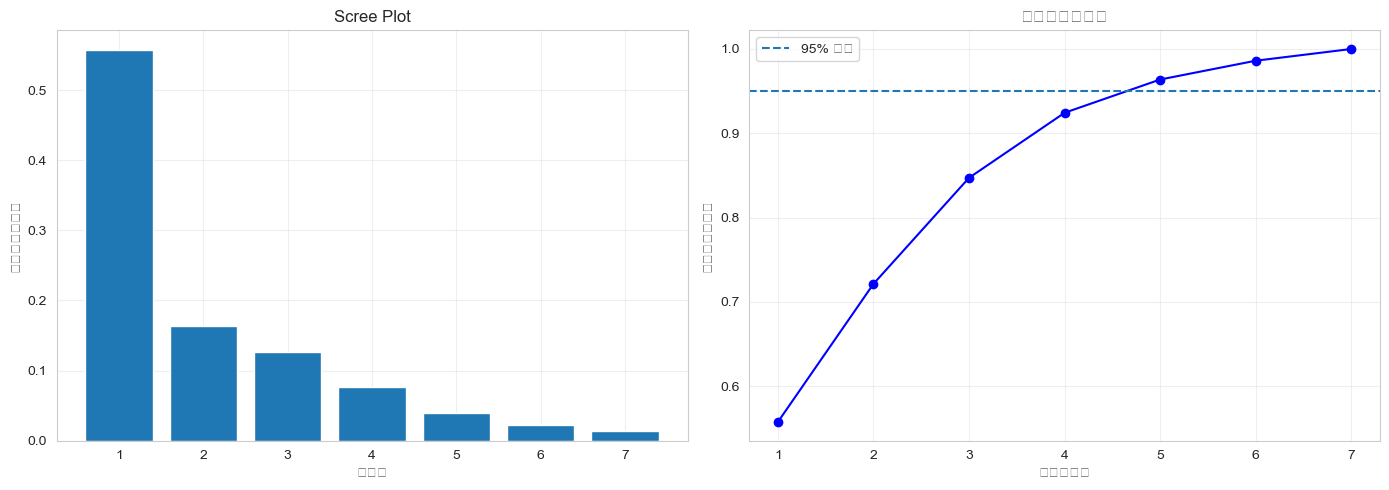

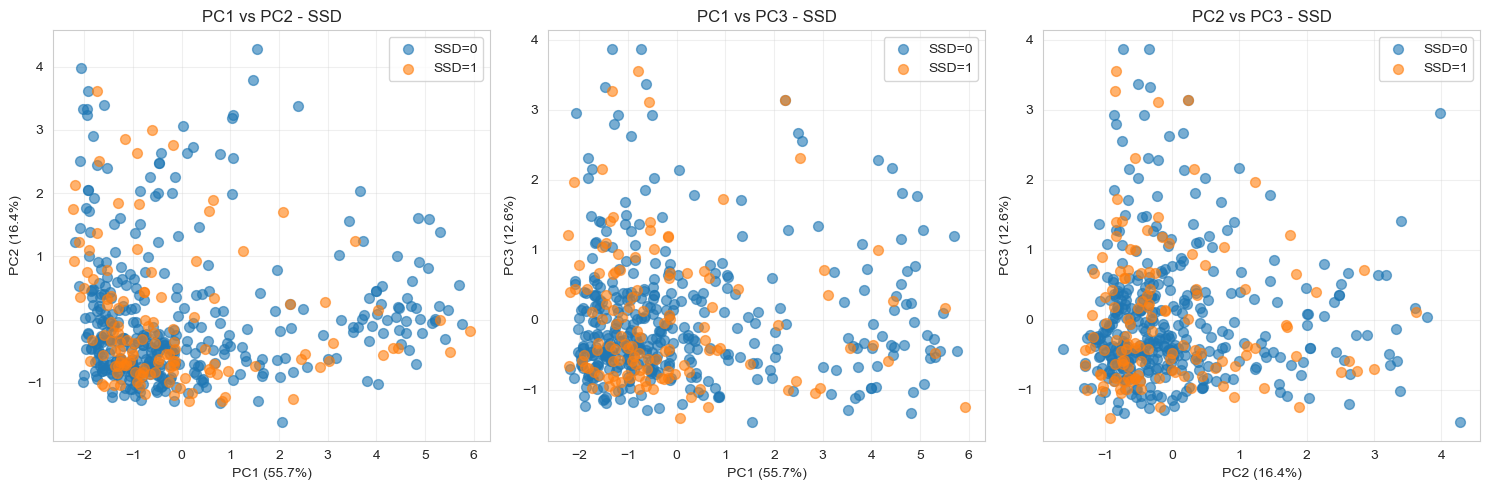

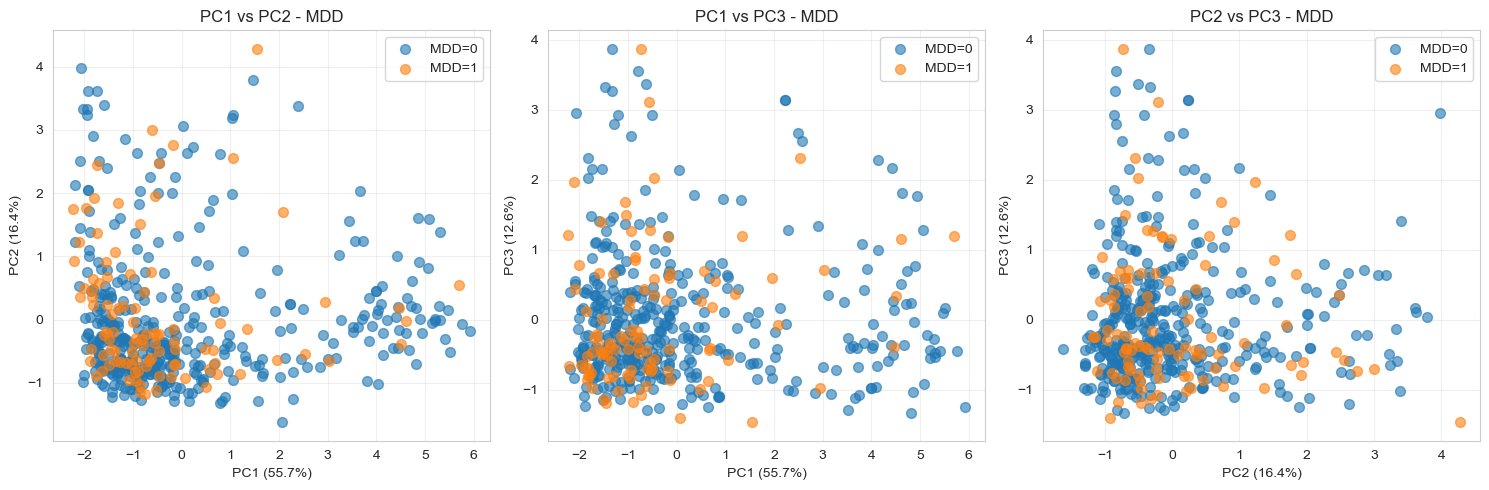

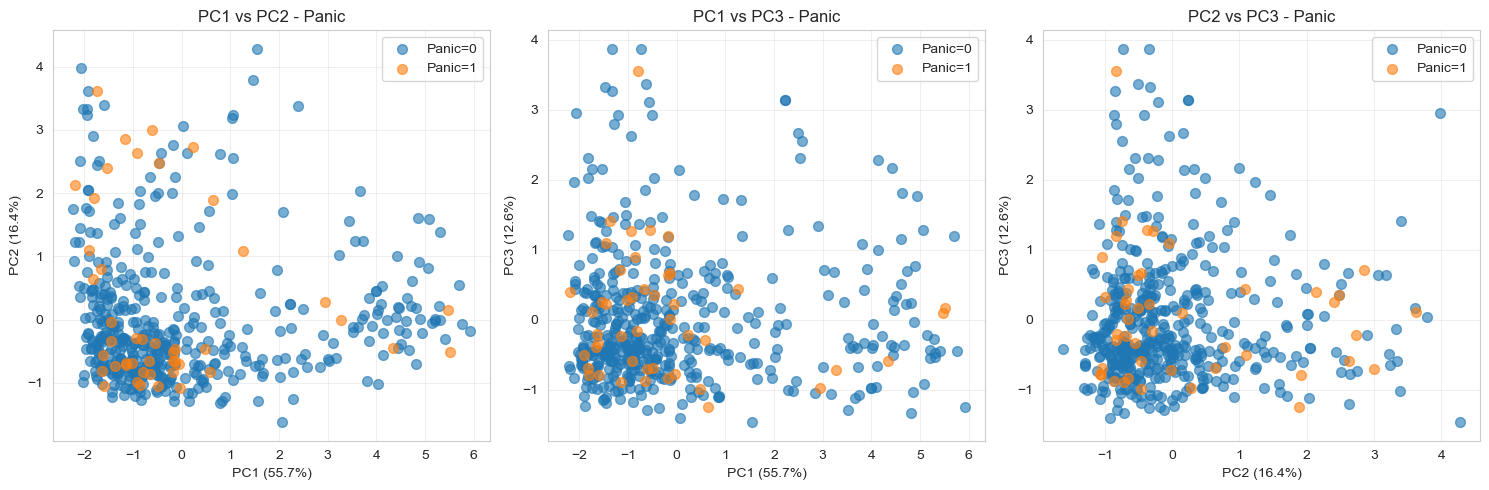

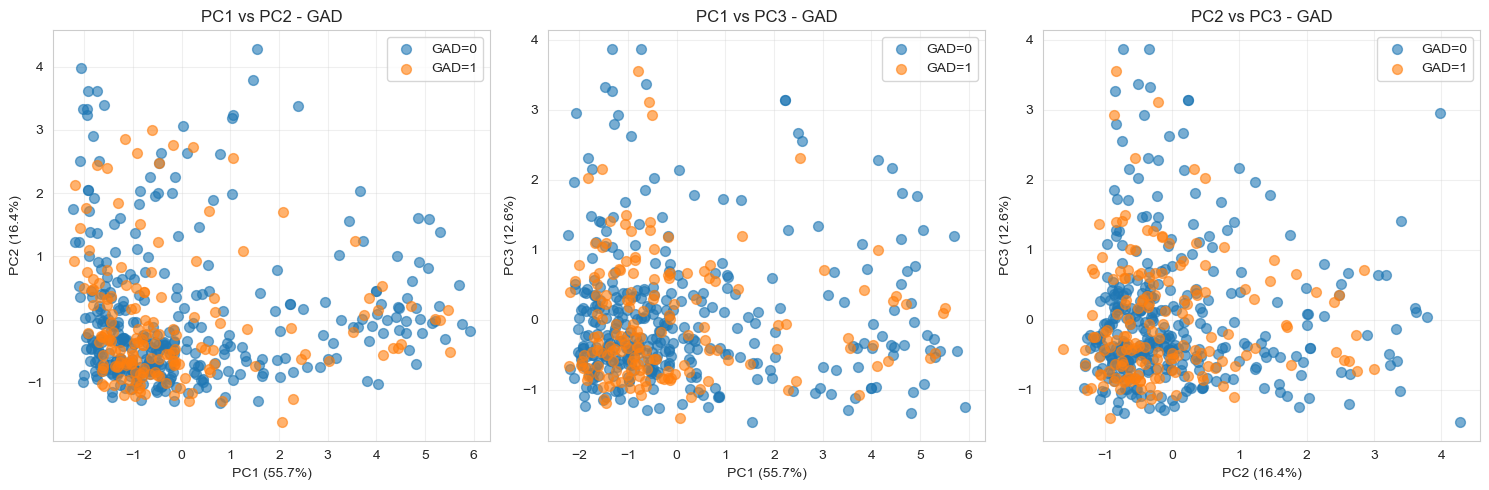


[5] 特徵重要性分析…

SSD 特徵重要性 (Top 10):
   feature  mutual_info  rf_importance  combined_score
2      BMI     0.021110       0.153820        0.824292
12     RSA     0.018757       0.102611        0.621697
9     LFHF     0.015830       0.095721        0.554336
5    MARTA     0.032547       0.002467        0.508019
11      FT     0.000000       0.124939        0.406119
6     SDNN     0.001466       0.104015        0.360630
8       HF     0.000000       0.102988        0.334765
10      SC     0.000000       0.099141        0.322262
7       LF     0.000000       0.096773        0.314565
4      TCA     0.018212       0.005539        0.297789


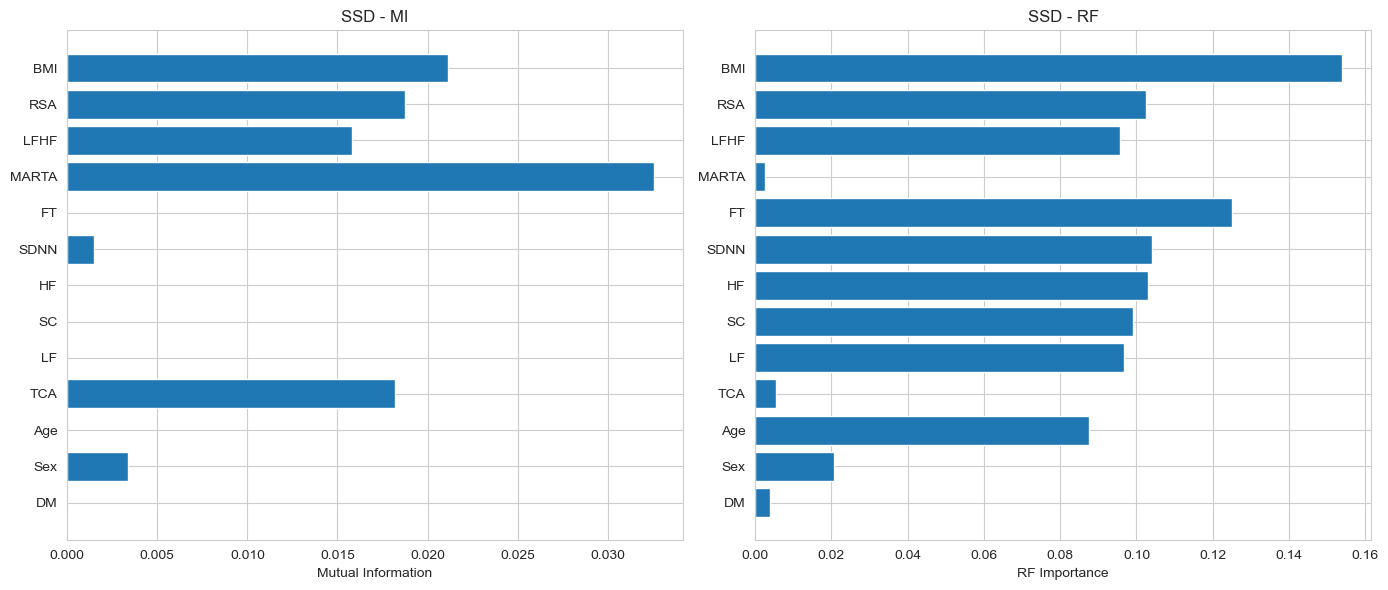


MDD 特徵重要性 (Top 10):
   feature  mutual_info  rf_importance  combined_score
8       HF     0.025837       0.113255        0.875831
5    MARTA     0.034373       0.033831        0.649356
0      Age     0.007273       0.110010        0.591460
11      FT     0.005765       0.111467        0.575962
2      BMI     0.005465       0.111817        0.573151
10      SC     0.001916       0.106540        0.498230
7       LF     0.000000       0.101538        0.448272
12     RSA     0.000000       0.100558        0.443947
6     SDNN     0.000000       0.097525        0.430555
9     LFHF     0.000000       0.084996        0.375244


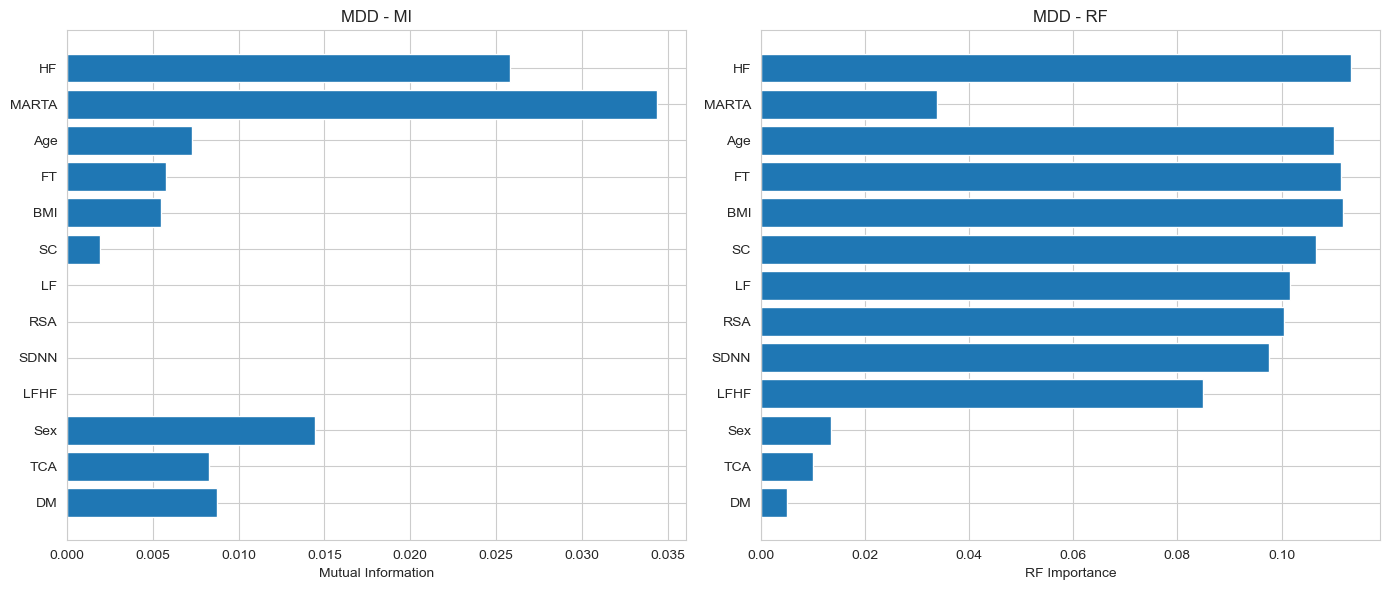


Panic 特徵重要性 (Top 10):
   feature  mutual_info  rf_importance  combined_score
0      Age     0.037368       0.093130        0.849847
9     LFHF     0.024369       0.133101        0.826075
10      SC     0.010566       0.094104        0.494888
11      FT     0.000000       0.122726        0.461026
2      BMI     0.000000       0.115960        0.435609
6     SDNN     0.000000       0.112446        0.422408
8       HF     0.000158       0.101030        0.381632
7       LF     0.000000       0.100721        0.378364
12     RSA     0.000000       0.092448        0.347286
1      Sex     0.000000       0.019747        0.074179


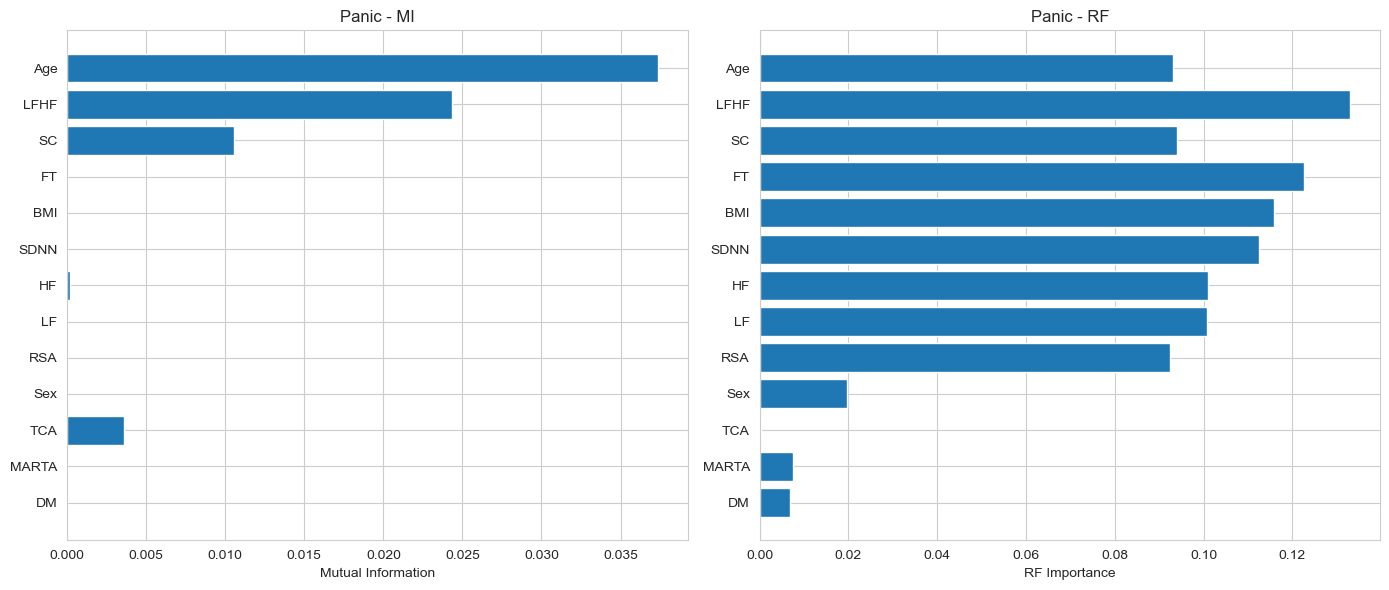


GAD 特徵重要性 (Top 10):
   feature  mutual_info  rf_importance  combined_score
9     LFHF     0.038540       0.097601        0.853132
11      FT     0.015905       0.138194        0.706343
6     SDNN     0.023092       0.108084        0.690636
12     RSA     0.015203       0.109123        0.592052
8       HF     0.013800       0.101732        0.547116
2      BMI     0.000000       0.123370        0.446366
1      Sex     0.026791       0.015684        0.404315
10      SC     0.000000       0.101337        0.366650
0      Age     0.000000       0.098520        0.356455
7       LF     0.000000       0.093404        0.337945


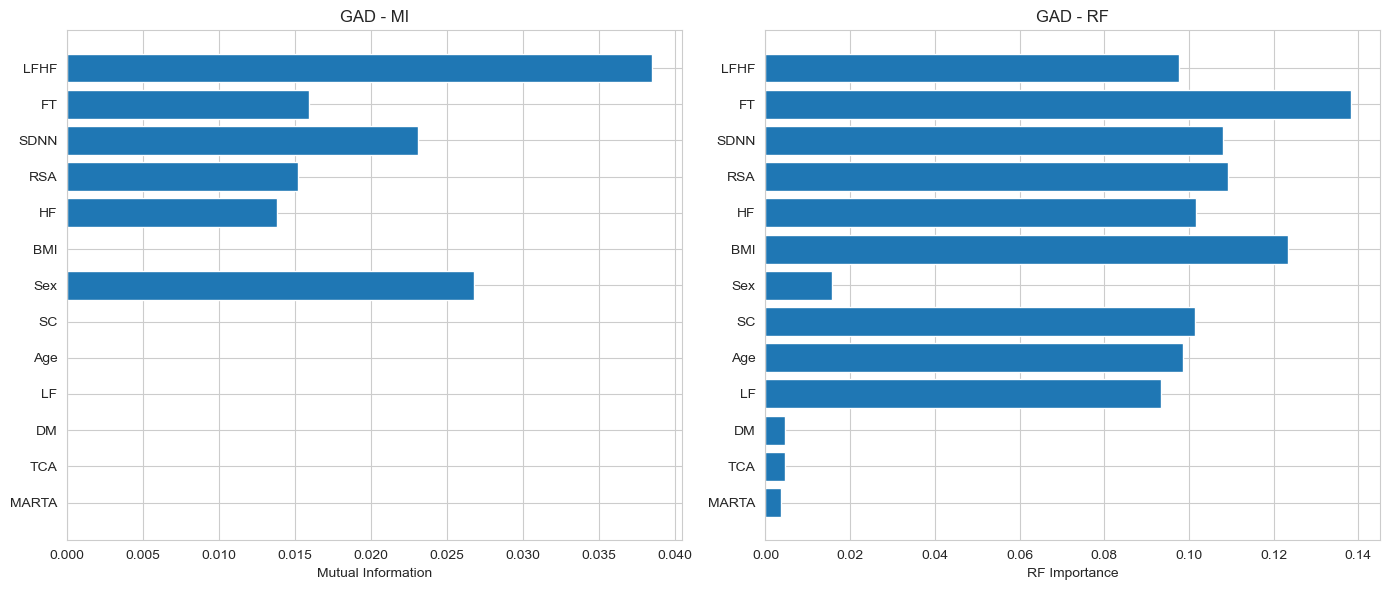


[6] 二元分類（無特徵工程；前處理不做 log）…

處理 SSD…
  → 保存最佳（依 Test AP）：Random Forest (CW)

處理 MDD…
  → 保存最佳（依 Test AP）：Random Forest (SMOTE)

處理 Panic…
  → 保存最佳（依 Test AP）：Random Forest (CW)

處理 GAD…
  → 保存最佳（依 Test AP）：Random Forest (SMOTE)

[7] 結果彙整…

完整模型比較:
Label                       Model CV_AP Test_AUC Test_AP Best_F1 Best_Threshold  N_Train  N_Test
  SSD Logistic Regression (SMOTE) 0.419    0.607   0.354   0.429          0.577      401     101
  SSD       Random Forest (SMOTE) 0.370    0.586   0.338   0.484          0.549      401     101
  SSD   Gradient Boosting (SMOTE) 0.374    0.575   0.287   0.462          0.401      401     101
  SSD                 SVM (SMOTE) 0.415    0.606   0.368   0.429          0.575      401     101
  SSD    Logistic Regression (CW) 0.405    0.611   0.359   0.438          0.445      401     101
  SSD          Random Forest (CW) 0.366    0.618   0.392   0.469          0.507      401     101
  SSD      Gradient Boosting (CW) 0.374    0.621   0.335   0.457         

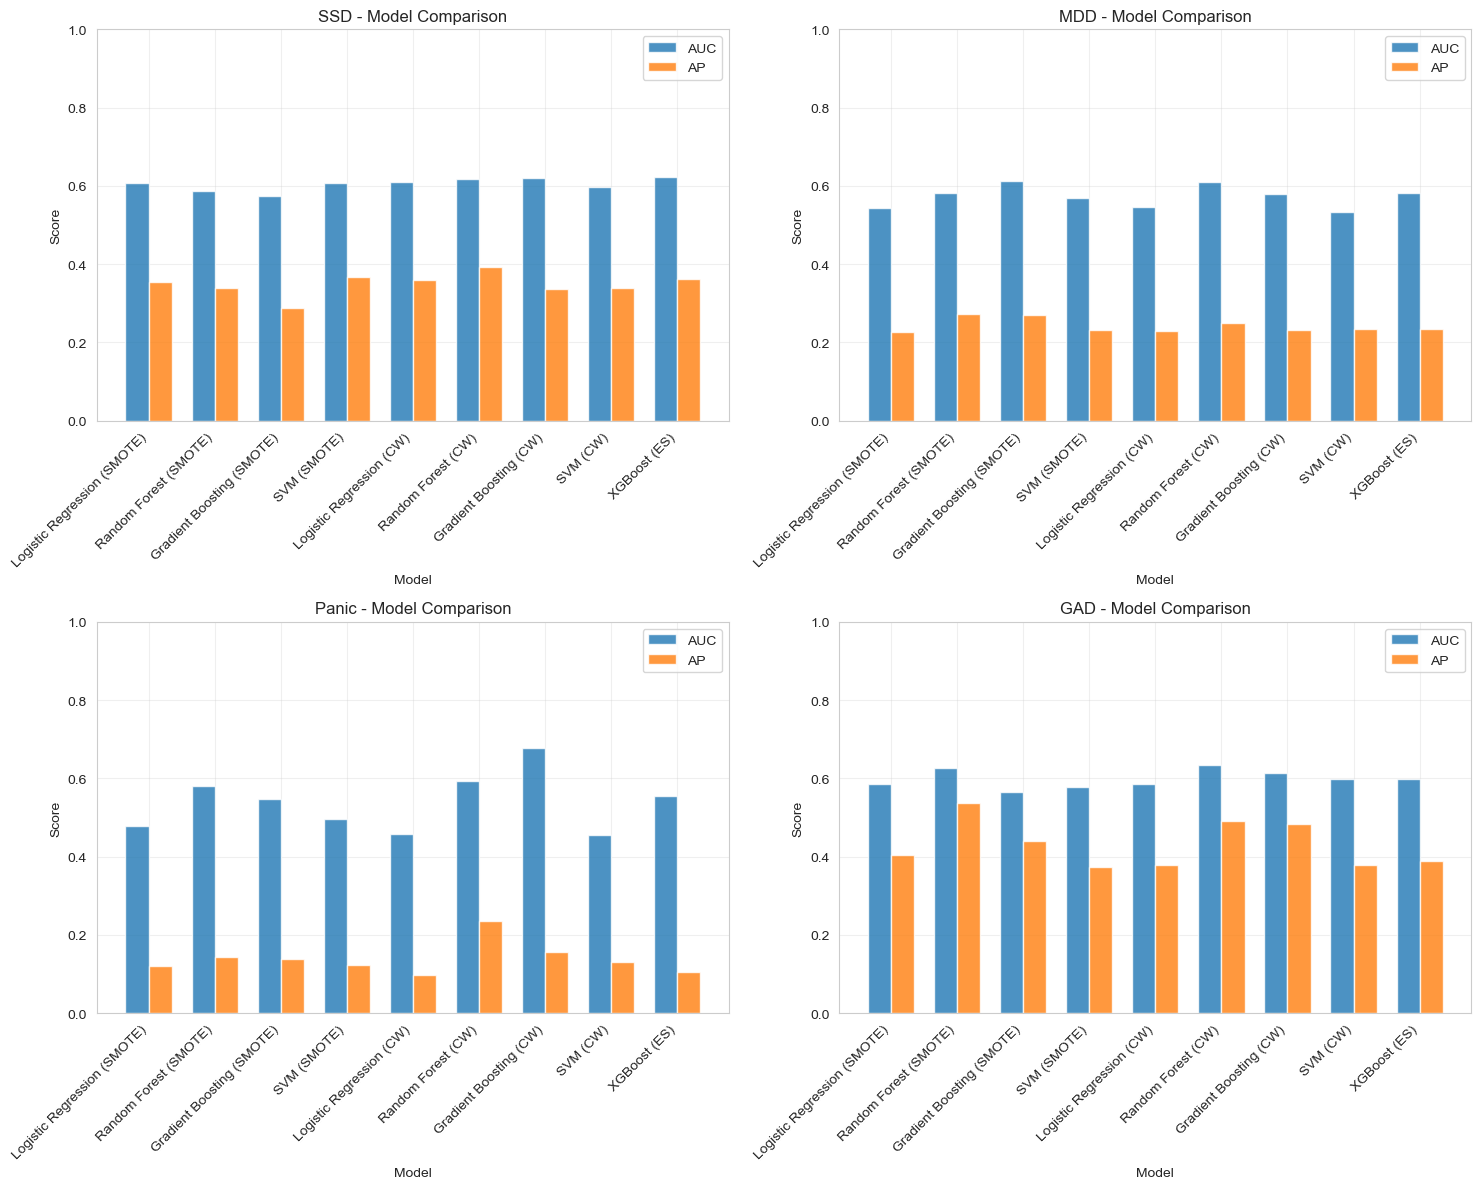


[8] 儲存結果…
✓ 結果已儲存至: D:\FLY114\Data_Improved\enhanced_analysis_summary.xlsx
✓ 圖表已儲存至: D:\FLY114\Data_Improved\enhanced_plots

分析完成!

最佳模型建議:
  SSD: XGBoost (ES) AUC=0.622, AP=0.361
  MDD: Gradient Boosting (SMOTE) AUC=0.611, AP=0.270
  Panic: Gradient Boosting (CW) AUC=0.678, AP=0.156
  GAD: Random Forest (CW) AUC=0.635, AP=0.491


In [4]:
import sys
import os, warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Optional deps
try:
    from umap import UMAP
    UMAP_OK = True
except Exception:
    try:
        from umap.umap_ import UMAP
        UMAP_OK = True
    except Exception:
        UMAP_OK = False

try:
    from scipy.stats import mannwhitneyu, ks_2samp
    SCIPY_OK = True
except Exception:
    SCIPY_OK = False

# ML stack
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import (
    StratifiedKFold, RandomizedSearchCV, 
    train_test_split
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    roc_auc_score, average_precision_score,
    precision_recall_curve, f1_score, confusion_matrix, roc_curve
)
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from scipy.stats import loguniform
import joblib

from xgboost import XGBClassifier
import xgboost as xgb  # for early stopping via xgb.train

# Plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# ==================== Paths ====================
BASE_DIR  = Path(r"D:\FLY114")
XLSX_PATH = BASE_DIR / "Diagnosis and autonomic marker data for VNS research_20250813.xlsx"
OUT_DIR   = BASE_DIR / "Data_Improved"
PLOTS_DIR = OUT_DIR / "enhanced_plots"
OUT_XLSX  = OUT_DIR / "enhanced_analysis_summary.xlsx"
MODELS_DIR = OUT_DIR / "models"
for d in [OUT_DIR, PLOTS_DIR, MODELS_DIR]:
    d.mkdir(parents=True, exist_ok=True)
SHEET_NAME = "Sheet1"

# ==================== Columns ====================
BASIC_COLS   = ["Age", "Sex", "BMI"]
LABEL_COLS   = ["SSD", "MDD", "Panic", "GAD"]
CONTROL_COLS = ["DM", "TCA", "MARTA"]
HRV_COLS     = ["SDNN", "LF", "HF", "LFHF", "SC", "FT", "RSA"]
ALL_FEATURES = BASIC_COLS + CONTROL_COLS + HRV_COLS  # ← 不做任何特徵工程

print("=" * 80)
print("FLY114：乾淨基線版（無特徵工程；PCA 不做 log；XGB EarlyStopping；SMOTE/CW 對照）")
print("=" * 80)

# ==================== 1. Load ====================
print("\n[1] 載入資料…")
df = pd.read_excel(XLSX_PATH, sheet_name=SHEET_NAME)
df.columns = [c.strip() for c in df.columns]
print(f"原始資料形狀: {df.shape}")

# ==================== 2. Basic cleaning ====================
print("\n[2] 基本清理…")
for c in [*ALL_FEATURES, *LABEL_COLS]:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# Sex to 0/1 when possible
if "Sex" in df.columns and (df["Sex"].dtype == object or df["Sex"].nunique(dropna=True) > 2):
    norm = df["Sex"].astype(str).str.lower().str[0].map({"m":1, "f":0})
    if norm.notna().mean() > 0.6:
        df["Sex"] = norm

# LFHF >= 0
if "LFHF" in df.columns:
    df.loc[df["LFHF"] < 0, "LFHF"] = np.nan

# IQR-based outlier -> NaN on numeric HRV + Age/BMI
def remove_outliers_iqr(df, cols, factor=3.0):
    df_clean = df.copy()
    for col in cols:
        if col in df_clean.columns:
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - factor * IQR
            upper = Q3 + factor * IQR
            outliers = ((df_clean[col] < lower) | (df_clean[col] > upper))
            if outliers.any():
                df_clean.loc[outliers, col] = np.nan
    return df_clean
numerical_cols = [c for c in HRV_COLS + ["Age", "BMI"] if c in df.columns]
df = remove_outliers_iqr(df, numerical_cols, factor=3.0)
print(f"清理後資料形狀: {df.shape}")

# ==================== 3. Missing overview ====================
print("\n[3] 缺失值概覽…")
feat_available = [c for c in ALL_FEATURES if c in df.columns]
missing_report = pd.DataFrame({
    'column': feat_available,
    'missing_count': [df[c].isna().sum() for c in feat_available],
    'missing_ratio': [df[c].isna().mean() for c in feat_available]
}).sort_values('missing_ratio', ascending=False)
print(missing_report)
for label in LABEL_COLS:
    if label in df.columns:
        mask = df[label].notna()
        print(f"  {label}: {mask.sum()} 個有效樣本")

# ==================== 4. PCA（不做 log） ====================
print("\n[4] PCA（不做 log）…")
hrv_cols_available = [c for c in HRV_COLS if c in df.columns]
X_pca = df[hrv_cols_available].copy()
# 僅做 KNNImputer + RobustScaler
imp = KNNImputer(n_neighbors=5)
X_pca_filled = pd.DataFrame(imp.fit_transform(X_pca), columns=X_pca.columns, index=X_pca.index)
scaler = RobustScaler()
X_pca_scaled = scaler.fit_transform(X_pca_filled)

pca = PCA(random_state=42)
X_pca_transformed = pca.fit_transform(X_pca_scaled)
explained_var = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    'Explained_Variance_Ratio': pca.explained_variance_ratio_,
    'Cumulative_Variance': np.cumsum(pca.explained_variance_ratio_)
})
print("\nPCA 解釋變異量:")
print(explained_var.head(10))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.bar(range(1, min(11, len(pca.explained_variance_ratio_)+1)), pca.explained_variance_ratio_[:10])
ax1.set_xlabel('主成分'); ax1.set_ylabel('解釋變異量比例'); ax1.set_title('Scree Plot'); ax1.grid(True, alpha=0.3)
ax2.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), 'bo-')
ax2.axhline(y=0.95, linestyle='--', label='95% 閾值')
ax2.set_xlabel('主成分數量'); ax2.set_ylabel('累積解釋變異量'); ax2.set_title('累積解釋變異量'); ax2.legend(); ax2.grid(True, alpha=0.3)
plt.tight_layout(); plt.savefig(PLOTS_DIR / "pca_variance_explained.png", dpi=300, bbox_inches='tight'); plt.show()

for label in LABEL_COLS:
    if label not in df.columns: 
        continue
    fig = plt.figure(figsize=(15, 5))
    ax1 = fig.add_subplot(131)
    mask0 = df[label] == 0; mask1 = df[label] == 1
    ax1.scatter(X_pca_transformed[mask0,0], X_pca_transformed[mask0,1], alpha=0.6, label=f'{label}=0', s=50)
    ax1.scatter(X_pca_transformed[mask1,0], X_pca_transformed[mask1,1], alpha=0.6, label=f'{label}=1', s=50)
    ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})'); ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})'); ax1.set_title(f'PC1 vs PC2 - {label}')
    ax1.legend(); ax1.grid(True, alpha=0.3)
    if len(pca.explained_variance_ratio_) >= 3:
        ax2 = fig.add_subplot(132)
        ax2.scatter(X_pca_transformed[mask0,0], X_pca_transformed[mask0,2], alpha=0.6, label=f'{label}=0', s=50)
        ax2.scatter(X_pca_transformed[mask1,0], X_pca_transformed[mask1,2], alpha=0.6, label=f'{label}=1', s=50)
        ax2.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})'); ax2.set_ylabel(f'PC3 ({pca.explained_variance_ratio_[2]:.1%})'); ax2.set_title(f'PC1 vs PC3 - {label}')
        ax2.legend(); ax2.grid(True, alpha=0.3)
        ax3 = fig.add_subplot(133)
        ax3.scatter(X_pca_transformed[mask0,1], X_pca_transformed[mask0,2], alpha=0.6, label=f'{label}=0', s=50)
        ax3.scatter(X_pca_transformed[mask1,1], X_pca_transformed[mask1,2], alpha=0.6, label=f'{label}=1', s=50)
        ax3.set_xlabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})'); ax3.set_ylabel(f'PC3 ({pca.explained_variance_ratio_[2]:.1%})'); ax3.set_title(f'PC2 vs PC3 - {label}')
        ax3.legend(); ax3.grid(True, alpha=0.3)
    plt.tight_layout(); plt.savefig(PLOTS_DIR / f"pca_3d_analysis_{label}.png", dpi=300, bbox_inches='tight'); plt.show()

# ==================== 5. Feature importance (RF + MI) ====================
print("\n[5] 特徵重要性分析…")
from sklearn.feature_selection import mutual_info_classif
feature_importance_results = {}
for label in LABEL_COLS:
    if label not in df.columns:
        continue
    mask = df[label].notna()
    available_features = [c for c in ALL_FEATURES if c in df.columns]
    if len(available_features) == 0:
        continue
    X = df.loc[mask, available_features].copy()
    y = df.loc[mask, label].values
    imp_local = KNNImputer(n_neighbors=5)
    X_filled = pd.DataFrame(imp_local.fit_transform(X), columns=X.columns)
    if len(np.unique(y)) < 2 or len(X) < 20:
        continue
    mi_scores = mutual_info_classif(X_filled, y, random_state=42)
    rf = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
    rf.fit(X_filled, y)
    rf_importance = rf.feature_importances_
    mi_norm = mi_scores / (np.max(mi_scores) + 1e-12)
    rf_norm = rf_importance / (np.max(rf_importance) + 1e-12)
    importance_df = pd.DataFrame({
        'feature': X.columns,
        'mutual_info': mi_scores,
        'rf_importance': rf_importance,
        'combined_score': (mi_norm + rf_norm) / 2.0
    }).sort_values('combined_score', ascending=False)
    feature_importance_results[label] = importance_df
    print(f"\n{label} 特徵重要性 (Top 10):")
    print(importance_df.head(10))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    top_n = min(15, len(importance_df)); top_features = importance_df.head(top_n)
    ax1.barh(range(top_n), top_features['mutual_info'].values); ax1.set_yticks(range(top_n)); ax1.set_yticklabels(top_features['feature'].values)
    ax1.set_xlabel('Mutual Information'); ax1.set_title(f'{label} - MI'); ax1.invert_yaxis()
    ax2.barh(range(top_n), top_features['rf_importance'].values); ax2.set_yticks(range(top_n)); ax2.set_yticklabels(top_features['feature'].values)
    ax2.set_xlabel('RF Importance'); ax2.set_title(f'{label} - RF'); ax2.invert_yaxis()
    plt.tight_layout(); plt.savefig(PLOTS_DIR / f"feature_importance_{label}.png", dpi=300, bbox_inches='tight'); plt.show()

# ==================== 6. Classification (no feature engineering; no log in preproc) ====================
print("\n[6] 二元分類（無特徵工程；前處理不做 log）…")

def _best_threshold_by_pr(y_true, y_prob):
    p, r, th = precision_recall_curve(y_true, y_prob)
    f1s = (2 * p * r) / (p + r + 1e-12)
    ix = np.nanargmax(f1s)
    best_th = th[ix-1] if ix > 0 and (ix-1) < len(th) else 0.5
    return float(best_th), float(f1s[ix])


def enhanced_binary_classification(df, label, feature_cols, save_model=True, n_iter=40, random_state=42):
    mask = df[label].notna()
    X = df.loc[mask, feature_cols].copy()
    y = df.loc[mask, label].astype(int).values
    if len(np.unique(y)) < 2 or len(X) < 60:
        return None

    # Column split
    cat_cols = [c for c in ['Sex','DM','TCA','MARTA'] if c in X.columns]
    num_cols = [c for c in X.columns if c not in cat_cols]

    # Numeric: KNNImputer + RobustScaler; Categorical: most_frequent
    numeric_pipe_general = Pipeline(steps=[
        ("imputer", KNNImputer(n_neighbors=5)),
        ("scaler", RobustScaler()),
    ])
    cat_pipe = Pipeline(steps=[("imputer", SimpleImputer(strategy="most_frequent"))])
    preproc_general = ColumnTransformer(
        transformers=[("num", numeric_pipe_general, num_cols), ("cat", cat_pipe, cat_cols)],
        remainder="drop"
    )

    # XGB: KNNImputer only (no scaling, no log)
    numeric_pipe_xgb = Pipeline(steps=[
        ("imputer", KNNImputer(n_neighbors=5)),
    ])
    preproc_xgb = ColumnTransformer(
        transformers=[("num", numeric_pipe_xgb, num_cols), ("cat", cat_pipe, cat_cols)],
        remainder="drop"
    )

    # Outer split (8/2)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=random_state, stratify=y
    )

    # Feature selection
    selector = SelectFromModel(
        RandomForestClassifier(n_estimators=400, random_state=random_state, n_jobs=-1, class_weight='balanced'),
        threshold="median"
    )

    models = {
        "Logistic Regression": LogisticRegression(max_iter=2000, random_state=random_state),
        "Random Forest": RandomForestClassifier(random_state=random_state, n_jobs=-1),
        "Gradient Boosting": GradientBoostingClassifier(random_state=random_state),
        "SVM": SVC(probability=True, random_state=random_state)
    }
    param_spaces = {
        "Logistic Regression": {"clf__C": loguniform(1e-3, 1e2), "clf__penalty": ["l2"], "clf__solver": ["lbfgs"]},
        "Random Forest": {"clf__n_estimators": [200, 400, 800], "clf__max_depth": [None, 5,10,20], "clf__min_samples_split":[2,5,10]},
        "Gradient Boosting": {"clf__n_estimators": [100, 200, 400], "clf__learning_rate": loguniform(1e-3, 3e-1), "clf__max_depth": [2,3,4]},
        "SVM": {"clf__C": loguniform(1e-2, 1e2), "clf__gamma": loguniform(1e-4, 1e-1), "clf__kernel": ["rbf"]}
    }

    results = {}
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

    # SMOTE branch
    for name, clf in models.items():
        pipe_smote = ImbPipeline(steps=[
            ("pre", preproc_general),
            ("select", selector),
            ("smote", SMOTE(random_state=random_state)),
            ("clf", clf)
        ])
        search = RandomizedSearchCV(
            estimator=pipe_smote,
            param_distributions=param_spaces[name],
            n_iter=n_iter, scoring="average_precision", cv=cv,
            n_jobs=-1, random_state=random_state, refit=True, verbose=0
        )
        search.fit(X_train, y_train)
        y_prob = search.best_estimator_.predict_proba(X_test)[:,1]
        best_th, best_f1 = _best_threshold_by_pr(y_test, y_prob)
        y_pred = (y_prob >= best_th).astype(int)
        results[f"{name} (SMOTE)"] = {
            "cv_ap_mean": float(search.best_score_),
            "best_params": search.best_params_,
            "test_auc": float(roc_auc_score(y_test, y_prob)),
            "test_ap": float(average_precision_score(y_test, y_prob)),
            "test_f1": float(f1_score(y_test, y_pred)),
            "best_threshold": best_th,
            "n_train": int(len(y_train)),
            "n_test": int(len(y_test))
        }
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure(figsize=(5,4)); plt.plot(fpr, tpr, lw=2); plt.plot([0,1],[0,1],'--')
        plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title(f'ROC - {label} - {name} (SMOTE)'); plt.grid(True, alpha=0.3)
        plt.tight_layout(); plt.savefig(PLOTS_DIR / f"ROC_{label}_{name.replace(' ','_')}_SMOTE.png", dpi=300, bbox_inches='tight'); plt.close()
        p, r, _ = precision_recall_curve(y_test, y_prob)
        plt.figure(figsize=(5,4)); plt.plot(r, p, lw=2)
        plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title(f'PR - {label} - {name} (SMOTE)'); plt.grid(True, alpha=0.3)
        plt.tight_layout(); plt.savefig(PLOTS_DIR / f"PR_{label}_{name.replace(' ','_')}_SMOTE.png", dpi=300, bbox_inches='tight'); plt.close()

    # Class-weight branch
    models_cw = {
        "Logistic Regression": LogisticRegression(max_iter=2000, random_state=random_state, class_weight='balanced'),
        "Random Forest": RandomForestClassifier(random_state=random_state, n_jobs=-1, class_weight='balanced'),
        "Gradient Boosting": GradientBoostingClassifier(random_state=random_state),
        "SVM": SVC(probability=True, random_state=random_state, class_weight='balanced')
    }
    for name, clf in models_cw.items():
        pipe_cw = Pipeline(steps=[
            ("pre", preproc_general),
            ("select", selector),
            ("clf", clf)
        ])
        search = RandomizedSearchCV(
            estimator=pipe_cw,
            param_distributions=param_spaces.get(name, {}),
            n_iter=n_iter,
            scoring="average_precision",
            cv=cv,
            n_jobs=-1,
            random_state=random_state,
            refit=True,
            verbose=0
        )
        search.fit(X_train, y_train)
        y_prob = search.best_estimator_.predict_proba(X_test)[:, 1]
        best_th, best_f1 = _best_threshold_by_pr(y_test, y_prob)
        y_pred = (y_prob >= best_th).astype(int)
        results[f"{name} (CW)"] = {
            "cv_ap_mean": float(search.best_score_),
            "best_params": search.best_params_,
            "test_auc": float(roc_auc_score(y_test, y_prob)),
            "test_ap": float(average_precision_score(y_test, y_prob)),
            "test_f1": float(f1_score(y_test, y_pred)),
            "best_threshold": best_th,
            "n_train": int(len(y_train)),
            "n_test": int(len(y_test))
        }
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure(figsize=(5,4)); plt.plot(fpr, tpr, lw=2); plt.plot([0,1],[0,1],'--')
        plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title(f'ROC - {label} - {name} (CW)'); plt.grid(True, alpha=0.3)
        plt.tight_layout(); plt.savefig(PLOTS_DIR / f"ROC_{label}_{name.replace(' ','_')}_CW.png", dpi=300, bbox_inches='tight'); plt.close()
        p, r, _ = precision_recall_curve(y_test, y_prob)
        plt.figure(figsize=(5,4)); plt.plot(r, p, lw=2)
        plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title(f'PR - {label} - {name} (CW)'); plt.grid(True, alpha=0.3)
        plt.tight_layout(); plt.savefig(PLOTS_DIR / f"PR_{label}_{name.replace(' ','_')}_CW.png", dpi=300, bbox_inches='tight'); plt.close()

    # XGBoost with early stopping
    pos = int(np.sum(y_train == 1)); neg = int(np.sum(y_train == 0))
    spw = (neg / max(pos, 1)) if (pos > 0) else 1.0

    xgb_base = XGBClassifier(
        n_estimators=700, learning_rate=0.05, max_depth=5,
        subsample=0.85, colsample_bytree=0.85, reg_lambda=1.0,
        random_state=random_state, n_jobs=-1, eval_metric='auc',
        scale_pos_weight=spw
    )
    pipe_xgb = Pipeline(steps=[("pre", preproc_xgb), ("select", selector), ("clf", xgb_base)])

    X_subtrain, X_valid, y_subtrain, y_valid = train_test_split(
        X_train, y_train, test_size=0.2, random_state=random_state, stratify=y_train
    )

    param_space_xgb = {
        "clf__n_estimators": [400, 700, 1000],
        "clf__learning_rate": [0.01, 0.03, 0.05, 0.1],
        "clf__max_depth": [3, 4, 5, 6],
        "clf__min_child_weight": [1, 3, 5],
        "clf__gamma": [0, 0.1, 0.3],
        "clf__subsample": [0.7, 0.85, 1.0],
        "clf__colsample_bytree": [0.7, 0.85, 1.0],
        "clf__reg_lambda": [0.1, 1, 5, 10],
        "clf__reg_alpha": [0, 0.1, 0.5],
    }

    search_xgb = RandomizedSearchCV(
        estimator=pipe_xgb,
        param_distributions=param_space_xgb,
        n_iter=n_iter, scoring="average_precision", cv=cv,
        n_jobs=-1, random_state=random_state, refit=False, verbose=0
    )
    search_xgb.fit(X_subtrain, y_subtrain)
    best_params = search_xgb.best_params_

    # Preprocess & select on subtrain only, then transform valid/test
    X_subtrain_t = preproc_xgb.fit_transform(X_subtrain)
    X_valid_t    = preproc_xgb.transform(X_valid)
    X_test_t     = preproc_xgb.transform(X_test)

    selector.fit(X_subtrain_t, y_subtrain)
    X_subtrain_s = selector.transform(X_subtrain_t)
    X_valid_s    = selector.transform(X_valid_t)
    X_test_s     = selector.transform(X_test_t)

    dsub  = xgb.DMatrix(X_subtrain_s, label=y_subtrain)
    dval  = xgb.DMatrix(X_valid_s,    label=y_valid)
    dtest = xgb.DMatrix(X_test_s)

    xgb_params = {
        "objective": "binary:logistic",
        "eval_metric": "auc",
        "eta": best_params.get("clf__learning_rate", 0.05),
        "max_depth": best_params.get("clf__max_depth", 5),
        "min_child_weight": best_params.get("clf__min_child_weight", 1),
        "gamma": best_params.get("clf__gamma", 0.0),
        "subsample": best_params.get("clf__subsample", 0.85),
        "colsample_bytree": best_params.get("clf__colsample_bytree", 0.85),
        "lambda": best_params.get("clf__reg_lambda", 1.0),
        "alpha": best_params.get("clf__reg_alpha", 0.0),
        "scale_pos_weight": spw,
        "seed": random_state,
        "nthread": -1
    }
    num_boost_round = best_params.get("clf__n_estimators", 700)

    bst = xgb.train(
        params=xgb_params,
        dtrain=dsub,
        num_boost_round=num_boost_round,
        evals=[(dsub, "train"), (dval, "valid")],
        early_stopping_rounds=50,
        verbose_eval=False
    )

    best_iter = getattr(bst, "best_iteration", None)
    try:
        if best_iter is not None:
            y_prob = bst.predict(dtest, iteration_range=(0, best_iter + 1))
        else:
            y_prob = bst.predict(dtest)
    except TypeError:
        ntree_limit = getattr(bst, "best_ntree_limit", None)
        if ntree_limit is not None:
            y_prob = bst.predict(dtest, ntree_limit=ntree_limit)
        elif best_iter is not None:
            y_prob = bst.predict(dtest, ntree_limit=best_iter + 1)
        else:
            y_prob = bst.predict(dtest)

    best_th, best_f1 = _best_threshold_by_pr(y_test, y_prob)
    y_pred = (y_prob >= best_th).astype(int)

    results["XGBoost (ES)"] = {
        "cv_ap_mean": float(search_xgb.best_score_),
        "best_params": best_params,
        "test_auc": float(roc_auc_score(y_test, y_prob)),
        "test_ap": float(average_precision_score(y_test, y_prob)),
        "test_f1": float(f1_score(y_test, y_pred)),
        "best_threshold": best_th,
        "n_train": int(len(y_train)),
        "n_test": int(len(y_test))
    }

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(5,4)); plt.plot(fpr, tpr, lw=2); plt.plot([0,1],[0,1],'--')
    plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title(f'ROC - {label} - XGBoost (EarlyStop)')
    plt.grid(True, alpha=0.3); plt.tight_layout()
    plt.savefig(PLOTS_DIR / f"ROC_{label}_XGBoost_ES.png", dpi=300, bbox_inches='tight'); plt.close()

    p, r, _ = precision_recall_curve(y_test, y_prob)
    plt.figure(figsize=(5,4)); plt.plot(r, p, lw=2)
    plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title(f'PR - {label} - XGBoost (EarlyStop)')
    plt.grid(True, alpha=0.3); plt.tight_layout()
    plt.savefig(PLOTS_DIR / f"PR_{label}_XGBoost_ES.png", dpi=300, bbox_inches='tight'); plt.close()

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,4)); sns.heatmap(cm, annot=True, fmt='d', cbar=False)
    plt.xlabel('Pred'); plt.ylabel('True'); plt.title(f'CM (th={best_th:.2f}) - {label} - XGBoost (ES)')
    plt.tight_layout(); plt.savefig(PLOTS_DIR / f"CM_{label}_XGBoost_ES.png", dpi=300, bbox_inches='tight'); plt.close()

    if save_model:
        best_name, best_res = max(results.items(), key=lambda x: x[1]["test_ap"])
        print(f"  → 保存最佳（依 Test AP）：{best_name}")
        if "XGBoost" in best_name:
            model_bundle = {
                "preproc_xgb": preproc_xgb,
                "selector": selector,
                "booster": bst,
                "best_iteration": getattr(bst, "best_iteration", None)
            }
            joblib.dump(model_bundle, MODELS_DIR / f"{label}_XGBoost_ES_bundle.joblib")

    return results

# Run all labels
all_classification_results = {}
for label in LABEL_COLS:
    if label not in df.columns:
        continue
    print(f"\n處理 {label}…")
    available_features = [c for c in ALL_FEATURES if c in df.columns]
    results_all = enhanced_binary_classification(
        df, label, available_features, 
        save_model=True, 
        n_iter=40,
        random_state=42
    )
    if results_all:
        all_classification_results[label] = results_all

# ==================== 7. Summary & plots ====================
print("\n[7] 結果彙整…")
comparison_rows = []
for label, model_results in all_classification_results.items():
    for model_name, metrics in model_results.items():
        comparison_rows.append({
            'Label': label,
            'Model': model_name,
            'CV_AP': f"{metrics['cv_ap_mean']:.3f}",
            'Test_AUC': f"{metrics['test_auc']:.3f}",
            'Test_AP': f"{metrics['test_ap']:.3f}",
            'Best_F1': f"{metrics['test_f1']:.3f}",
            'Best_Threshold': f"{metrics['best_threshold']:.3f}",
            'N_Train': metrics['n_train'],
            'N_Test': metrics['n_test']
        })
comparison_df = pd.DataFrame(comparison_rows)
print("\n完整模型比較:")
print(comparison_df.to_string(index=False) if not comparison_df.empty else "（尚無可用的模型結果）")

# Per-label AUC vs AP chart
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()
for idx, label in enumerate(LABEL_COLS):
    if label in all_classification_results:
        results = all_classification_results[label]
        models = list(results.keys())
        aucs = [results[m]['test_auc'] for m in models]
        aps = [results[m]['test_ap'] for m in models]
        x = np.arange(len(models)); width = 0.35
        axes[idx].bar(x - width/2, aucs, width, label='AUC', alpha=0.8)
        axes[idx].bar(x + width/2, aps, width, label='AP', alpha=0.8)
        axes[idx].set_xlabel('Model'); axes[idx].set_ylabel('Score'); axes[idx].set_title(f'{label} - Model Comparison')
        axes[idx].set_xticks(x); axes[idx].set_xticklabels(models, rotation=45, ha='right')
        axes[idx].legend(); axes[idx].grid(True, alpha=0.3); axes[idx].set_ylim([0, 1])
plt.tight_layout(); plt.savefig(PLOTS_DIR / "model_comparison_all_labels.png", dpi=300, bbox_inches='tight'); plt.show()

# ==================== 8. Save outputs ====================
print("\n[8] 儲存結果…")
with pd.ExcelWriter(OUT_XLSX, engine="xlsxwriter") as writer:
    (comparison_df if not comparison_df.empty else pd.DataFrame({"msg": ["no model results"]})).to_excel(writer, sheet_name="Model_Comparison", index=False)
    if 'explained_var' in globals() and isinstance(explained_var, pd.DataFrame) and not explained_var.empty:
        explained_var.to_excel(writer, sheet_name="PCA_Variance", index=False)
    if 'feature_importance_results' in globals() and isinstance(feature_importance_results, dict):
        for label, imp_df in feature_importance_results.items():
            if isinstance(imp_df, pd.DataFrame) and not imp_df.empty:
                sheet_name = f"Feature_Imp_{label}"[:31]
                imp_df.to_excel(writer, sheet_name=sheet_name, index=False)
    if 'df' in globals() and {'UMAP1', 'UMAP2'}.issubset(set(df.columns)):
        cols_to_save = ['UMAP1', 'UMAP2'] + [c for c in LABEL_COLS if c in df.columns]
        df[cols_to_save].to_excel(writer, sheet_name="UMAP_Embedding", index=False)

print(f"✓ 結果已儲存至: {OUT_XLSX}")
print(f"✓ 圖表已儲存至: {PLOTS_DIR}")

print("\n" + "=" * 80)
print("分析完成!")
print("=" * 80)

print("\n最佳模型建議:")
has_any = False
for label in LABEL_COLS:
    if label in all_classification_results and all_classification_results[label]:
        results = all_classification_results[label]
        if len(results) > 0:
            best_model = max(results.items(), key=lambda x: x[1].get('test_auc', float('-inf')))
            print(f"  {label}: {best_model[0]} AUC={best_model[1].get('test_auc', float('nan')):.3f}, AP={best_model[1].get('test_ap', float('nan')):.3f}")
            has_any = True
if not has_any:
    print("  （尚無可用的模型結果）")
